# 学习 深度学习 知识历程 主要运用Pytorch+Neurolab+Keras

In [1]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import jupyterthemes.jtplot as jtplot
jtplot.style()

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pylab as plt
import neurolab as nl
import os
import keras
from sklearn.preprocessing import scale, normalize
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.layers import Dense, LSTM, Input, Embedding
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Activation
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


# keras 学习

## keras的一个简单的例子，Sequential的简单应用之回归（Regressor)

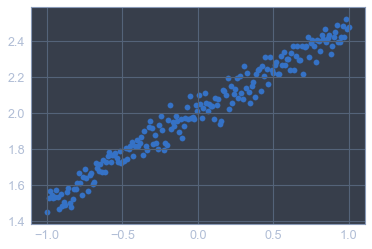

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
train error: 3.4971573
train error: 0.1078252
train error: 0.005488496
train error: 0.0029308293
train error: 0.002692712
40/40 [==============================] - 0s 391us/step
Testing Error 0.003384897019714117
Weight= [[0.5056699]] 
 biase= [2.0036397]


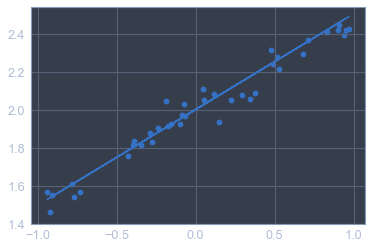

In [4]:
# 构建数据，数据预处理
np.random.seed(1337)
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))

plt.figure()
plt.scatter(X, Y)
plt.show()

X_train, y_train = X[:160], Y[:160]
X_test, y_test = X[160:], Y[160:]

# 初始化模型
model = Sequential()
# 构建网络
model.add(Dense(input_dim=1, units=1,
                activation='relu'))  # 为model加入一个输入，一个输出的隐藏层，激活函数使用relu
# 编译模型
model.compile(
    loss='mse', optimizer='sgd'
)  # 使用.compile() 来配置学习过程，误差计算使用“mse"（mean_square_erro),优化器使用“sgd"
# 训练模型
for i in range(401):
    train_error = model.train_on_batch(X_train, y_train)
    if i % 100 == 0:
        print("train error:", train_error)

# 测试
test_error = model.evaluate(X_test, y_test, batch_size=40)
print('Testing Error', test_error)
weight, biase = model.layers[0].get_weights()
print('Weight=', weight, '\n biase=', biase)

# 预测
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## keras的一个简单的例子，Sequential的简单应用之分类（classifier）

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Activation
from keras.optimizers import RMSprop

# 加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 数据预处理
X_train = X_train.reshape(X_train.shape[0],
                          -1) / 255  # 该数据有60000行和784列（即有784个features）
X_test = X_test.reshape(X_test.shape[0], -1) / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 模型初始化并 构建网络
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])
# 编译模型
rmsprop = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
print('Training---------------------')
model.fit(X_train, y_train, epochs=2, batch_size=32)

# 测试
loss, accuracy = model.evaluate(X_test, y_test)
print('test loss', loss)
print('test accuracy', accuracy)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 551s 48us/step
Training---------------------
Epoch 1/2
60000/60000 [==============================] - 3s 45us/step - loss: 0.3372 - acc: 0.9062
Epoch 2/2
10000/10000 [==============================] - 0s 23us/step
test loss 0.1673188134908676
test accuracy 0.9517


## CNN学习

In [6]:
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

# 加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 数据预处理
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# 模型初始化 并 构建网络
model = Sequential()

# 第一层数据
model.add(
    Conv2D(  # 滤波器
        kernel_size=(5, 5),  # 图片的长、宽
        padding='same',  # 滤波模型：same model
        input_shape=(1, 28, 28),  # 输入的单个图片大小 
        filters=32  # 生成图片数目(高度)
    ))
model.add(Activation('relu'))
# 第一层Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# 第二层
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 全连接层
# 1
model.add(Flatten())  # 使用Flatten将三维的层抹平至一维的层
model.add(Dense(1024))
model.add(Activation('relu'))
# 2
model.add(Dense(10))
model.add(Activation('softmax'))
# 编译模型
adam = Adam()
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=2, batch_size=32)

# 测试
loss, accuracy = model.evaluate(X_test, y_test)
print('test loss', loss)
print('test accuracy', accuracy)

Epoch 1/2
60000/60000 [==============================] - 41s 677us/step - loss: 0.4006 - acc: 0.9280
Epoch 2/2
10000/10000 [==============================] - 1s 134us/step
test loss 0.08822948239189572
test accuracy 0.9734


## RNN学习之分类 (RNN Classifier)

In [ ]:
# from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Activation, SimpleRNN

time_steps = 28  # 图片长度
input_size = 28  # 图片宽度
batch_size = 32
batch_index = 0
output_size = 10
cell_size = 32
lr = 0.001

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 数据预处理
X_train = X_train.reshape(-1, 28, 28) / 255
X_test = X_test.reshape(-1, 28, 28) / 255
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# 模型初始化 并 构建网络
model = Sequential()

# RNN cell
model.add(
    SimpleRNN(batch_input_shape=(batch_size, time_steps, input_size),
              units=cell_size))
# output layer
model.add(Dense(output_size))
model.add(Activation('softmax'))

# 编译模型
adam = Adam(lr)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
cost = model.fit(X_train, y_train, epochs=3)
# 测试

## RNN学习之回归 （RNN Regressor）

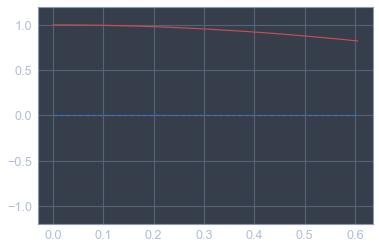

train cost:  0.5094495


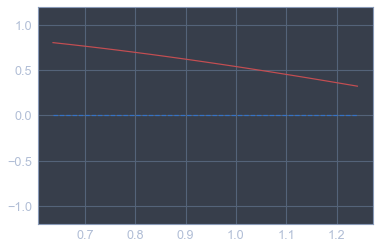

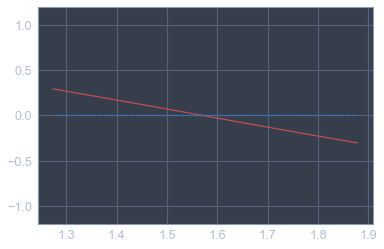

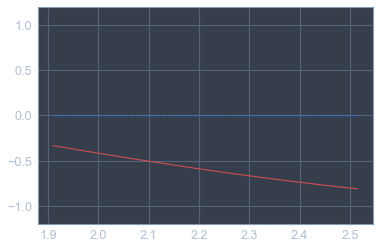

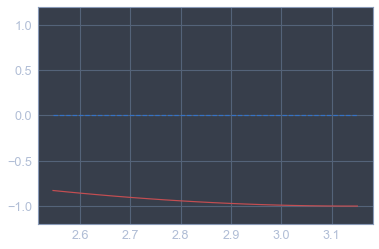

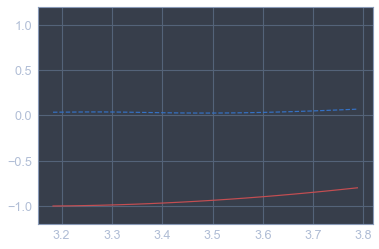

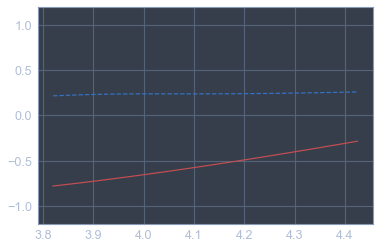

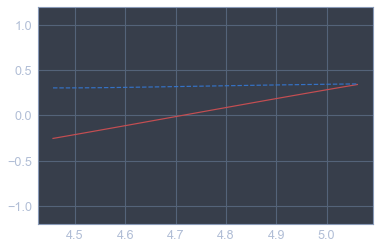

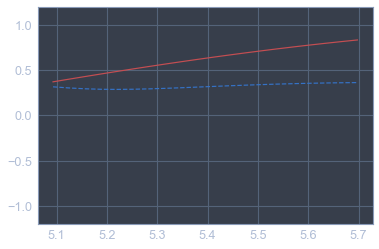

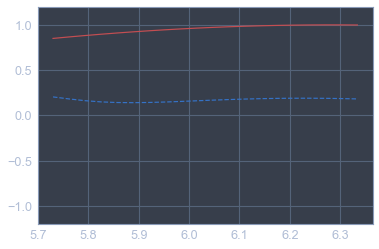

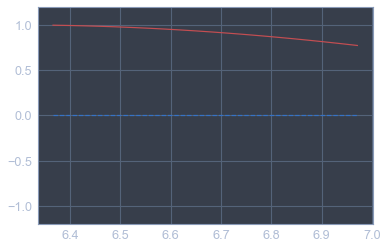

train cost:  0.41394645


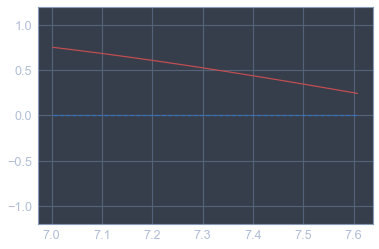

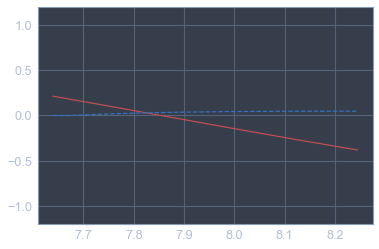

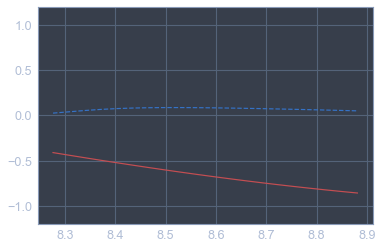

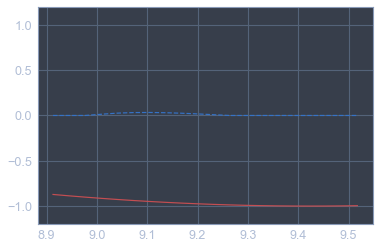

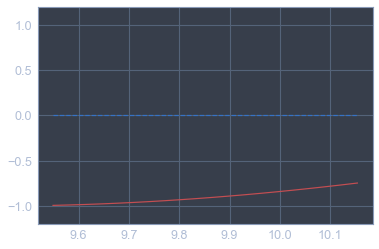

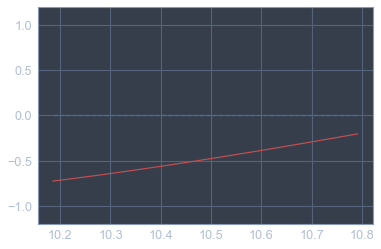

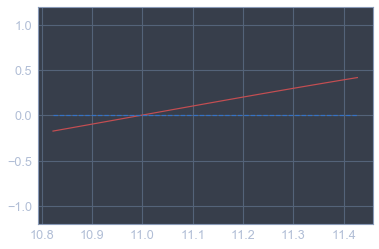

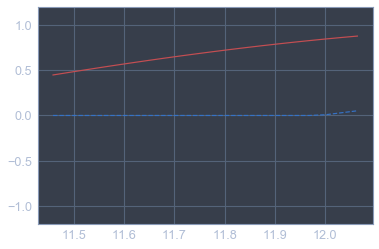

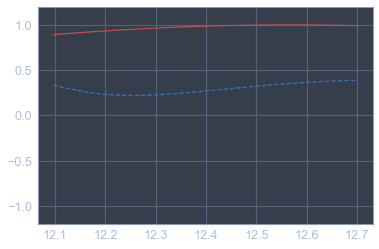

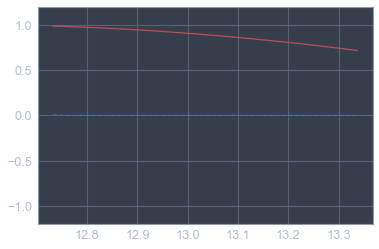

train cost:  0.32750952


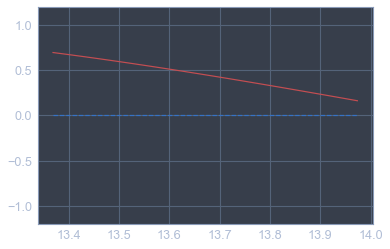

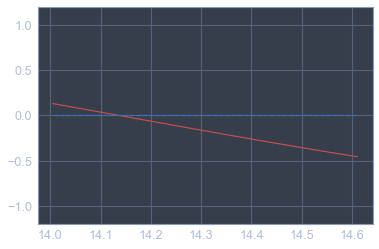

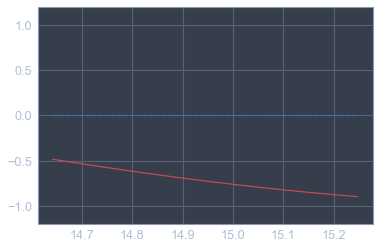

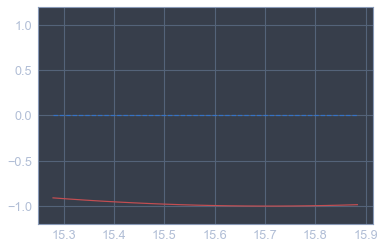

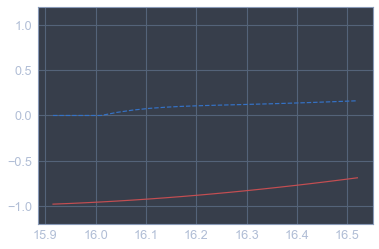

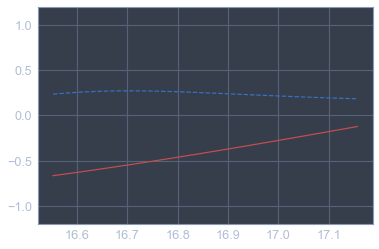

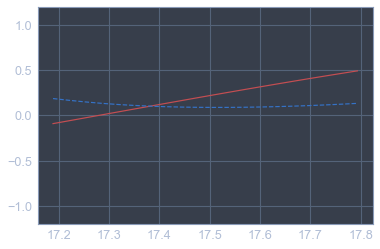

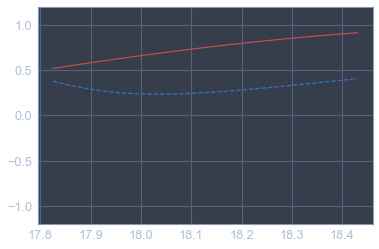

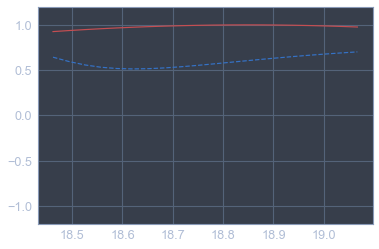

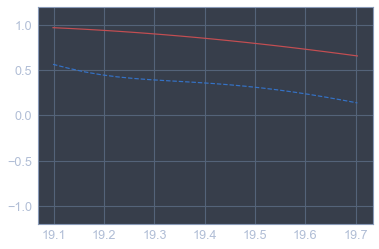

train cost:  0.30510083


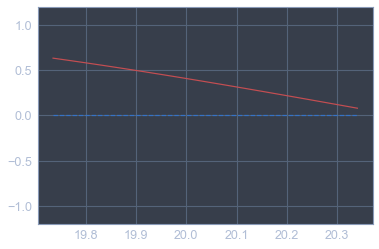

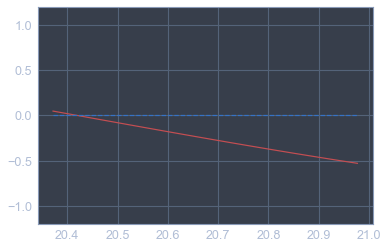

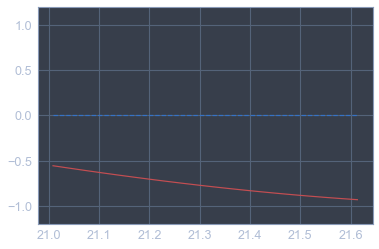

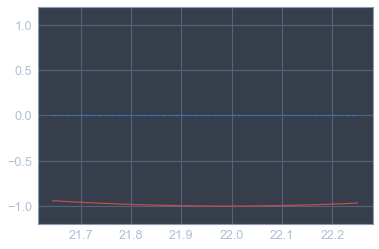

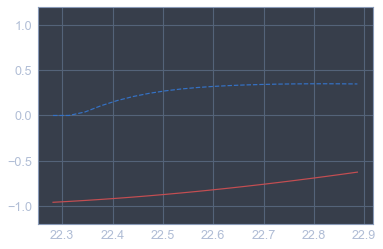

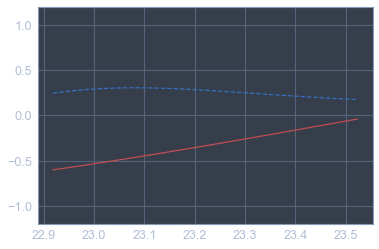

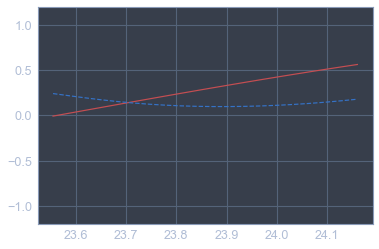

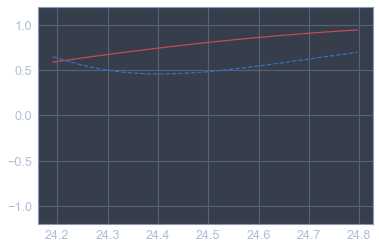

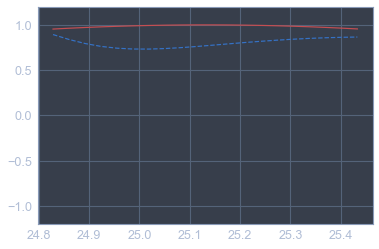

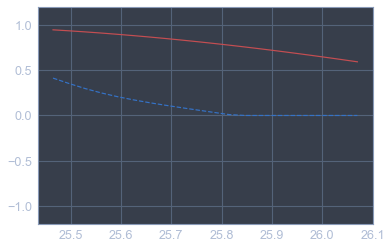

train cost:  0.28226653


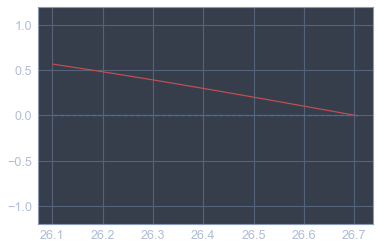

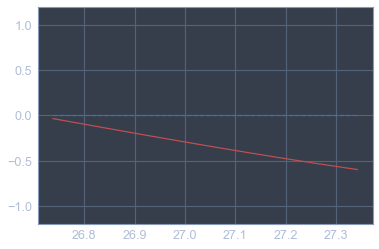

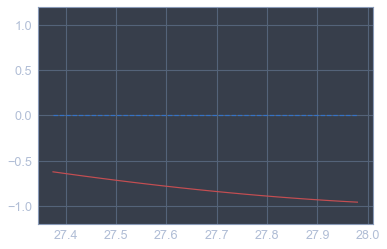

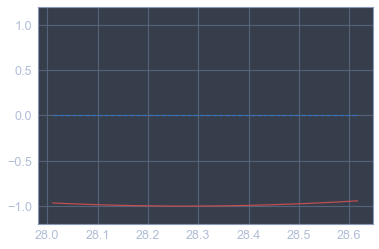

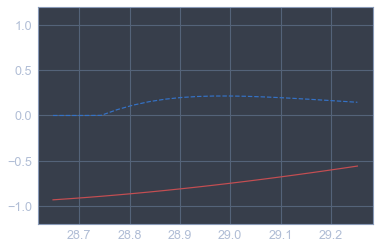

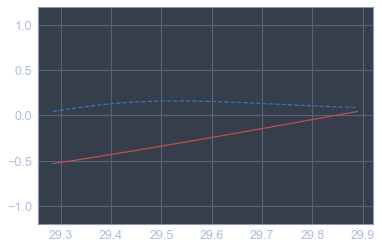

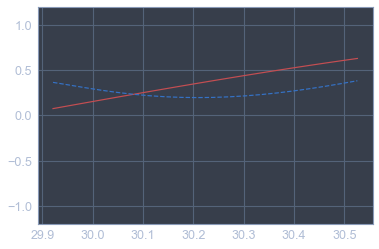

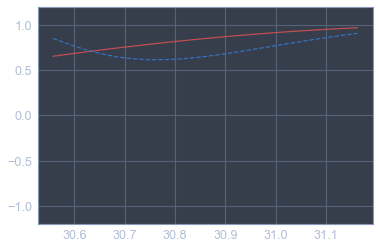

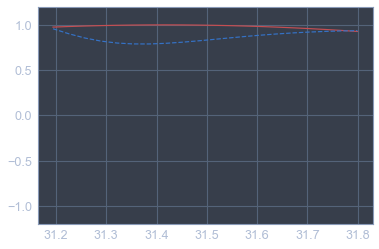

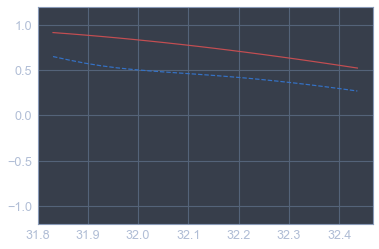

train cost:  0.25314888


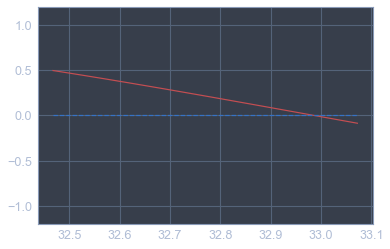

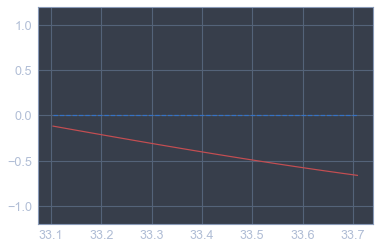

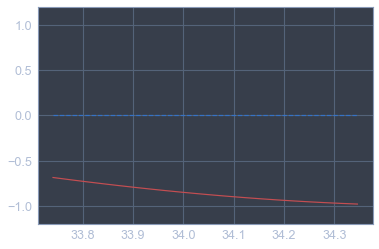

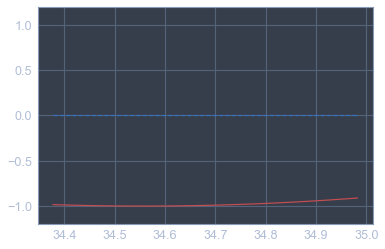

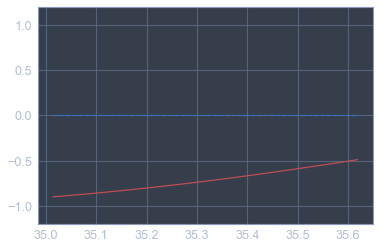

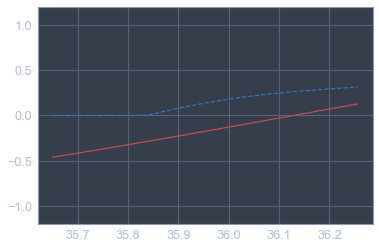

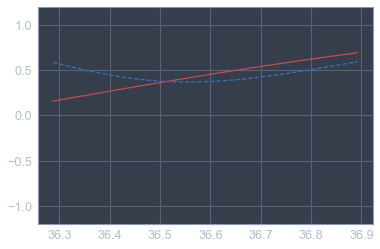

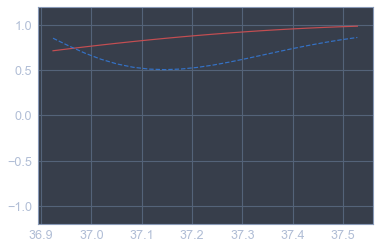

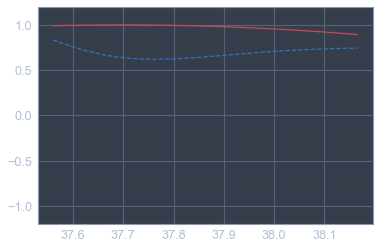

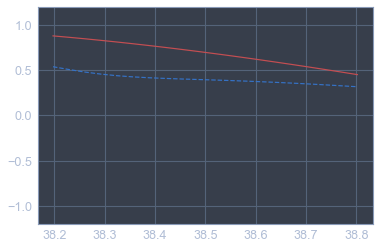

train cost:  0.2575348


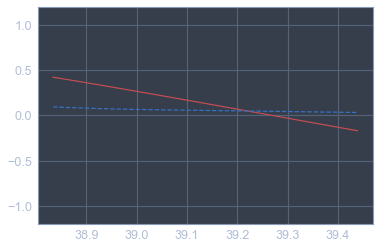

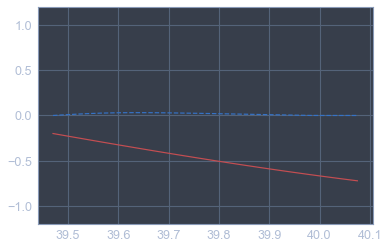

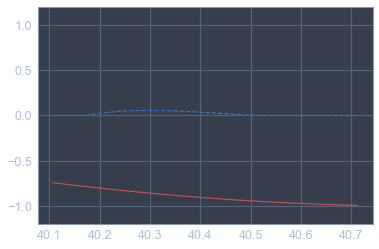

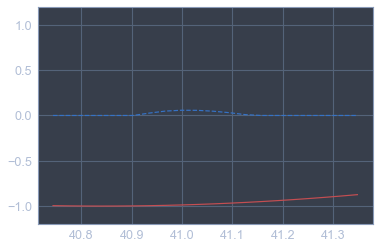

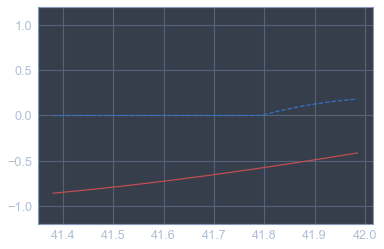

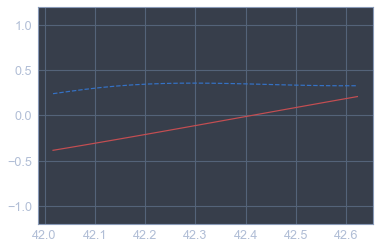

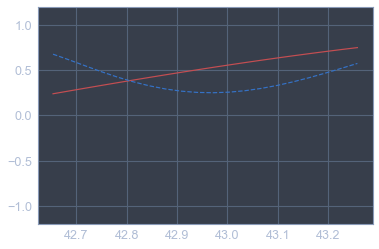

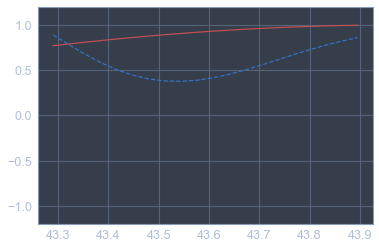

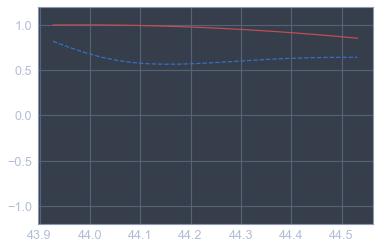

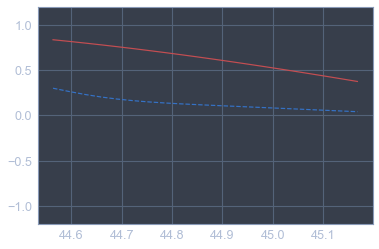

train cost:  0.25837296


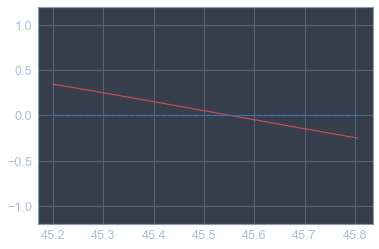

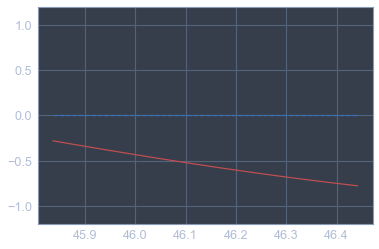

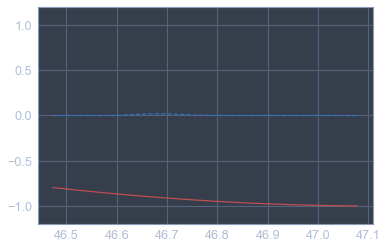

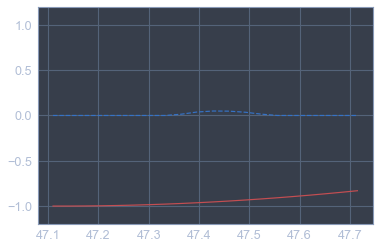

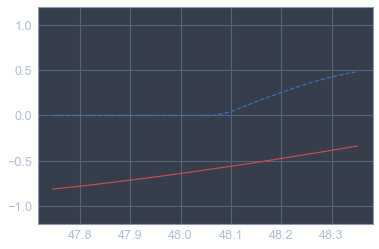

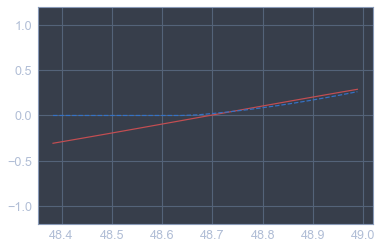

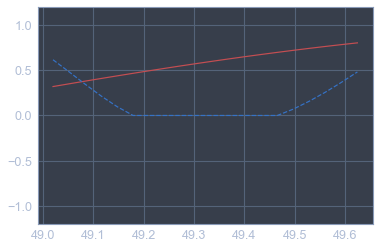

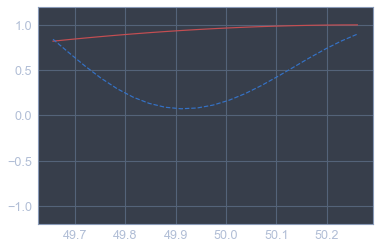

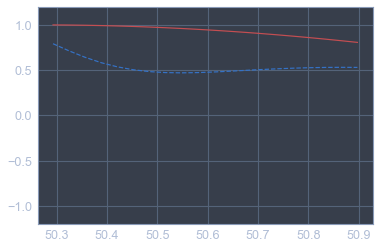

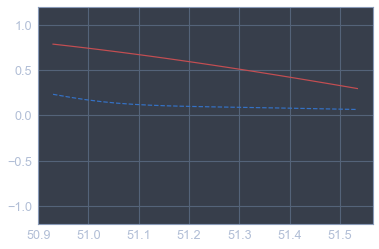

train cost:  0.28918365


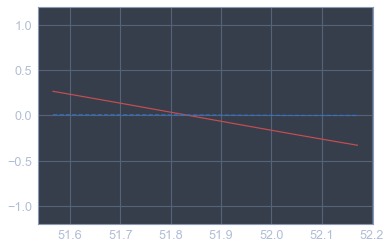

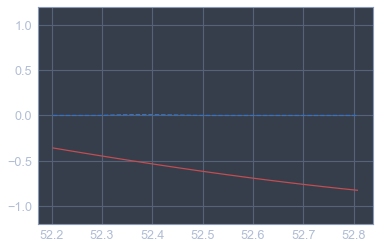

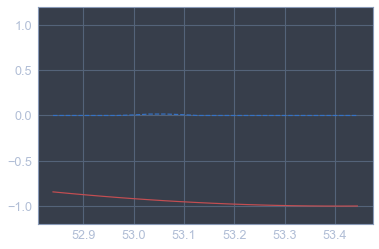

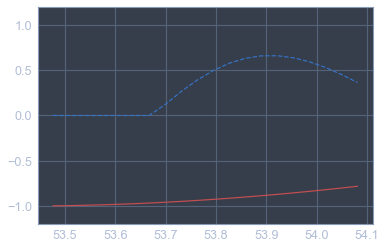

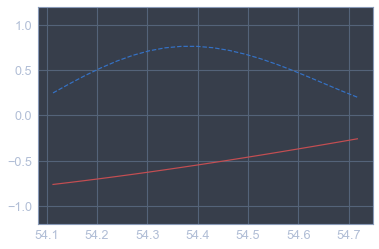

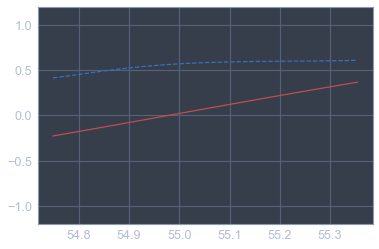

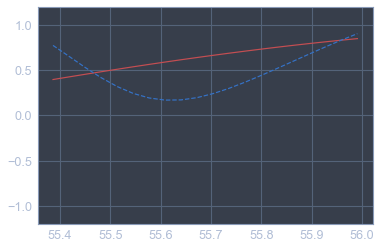

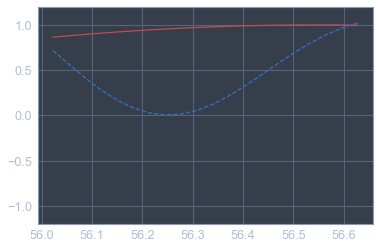

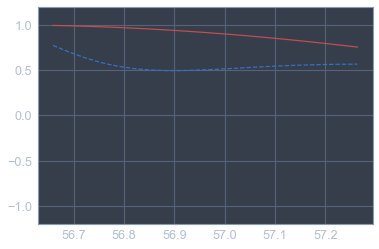

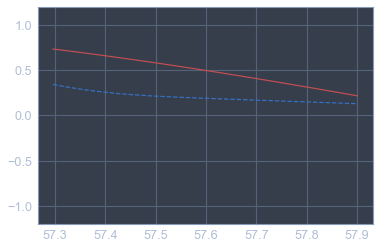

train cost:  0.28627542


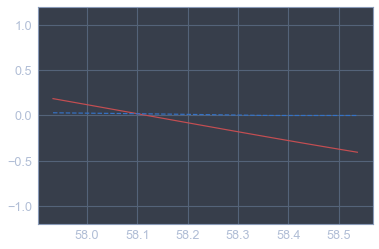

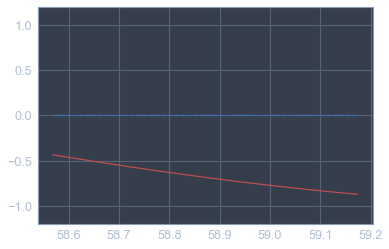

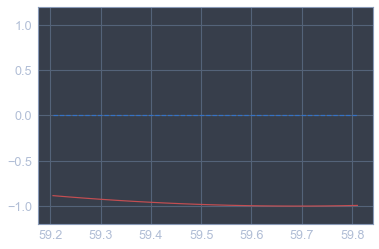

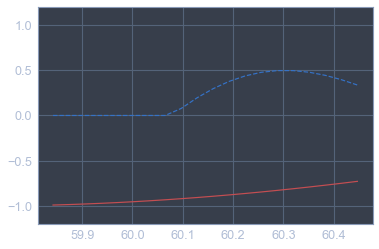

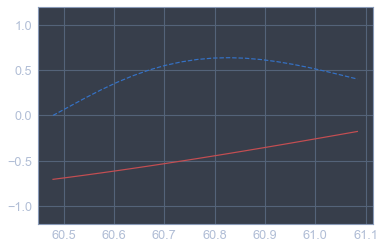

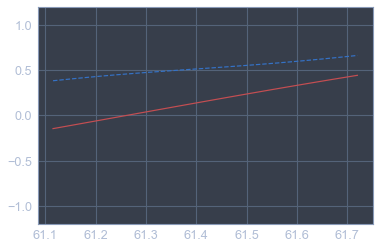

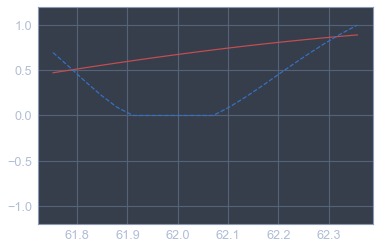

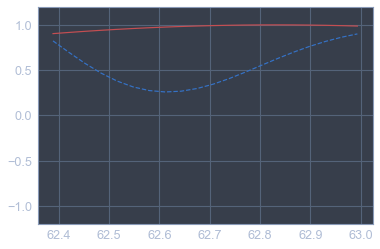

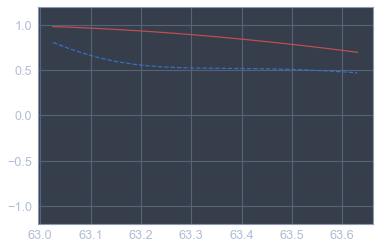

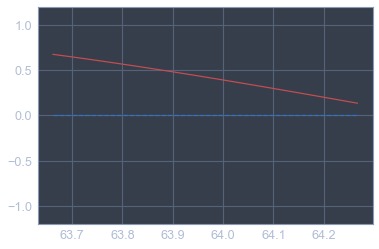

train cost:  0.2665046


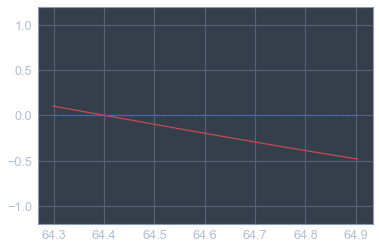

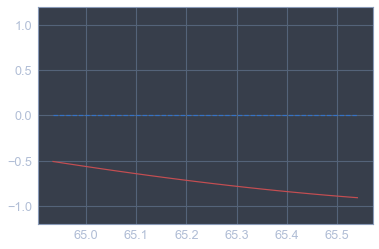

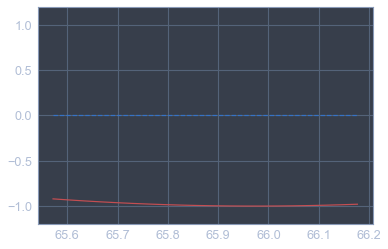

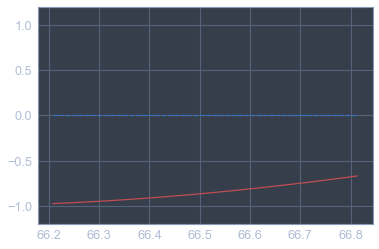

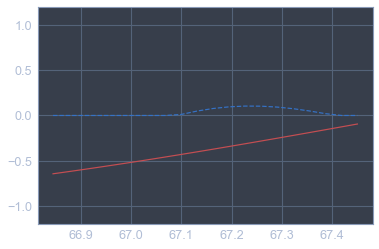

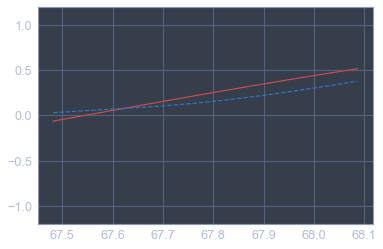

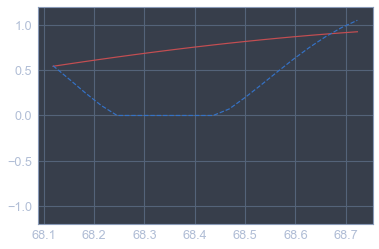

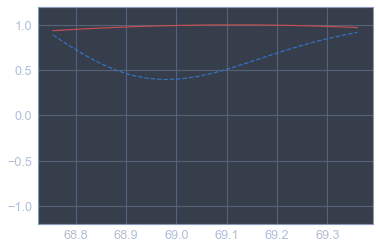

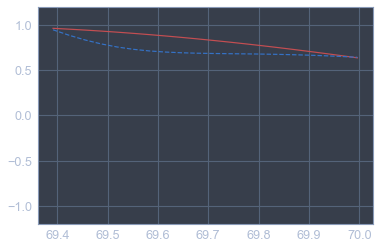

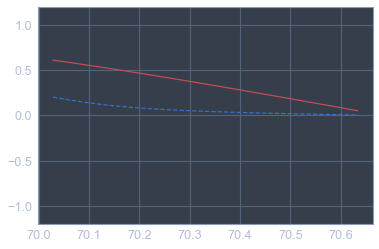

train cost:  0.3049615


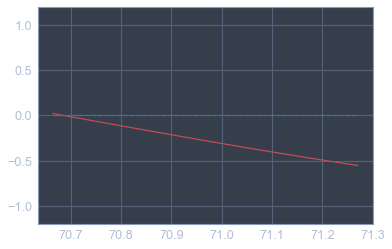

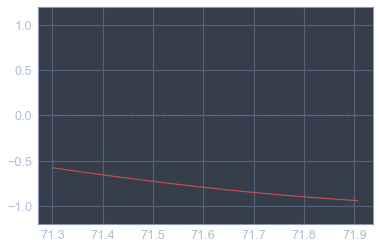

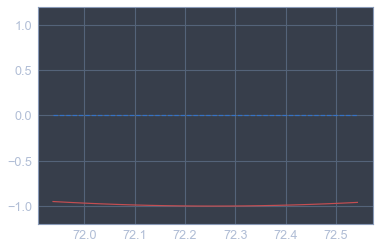

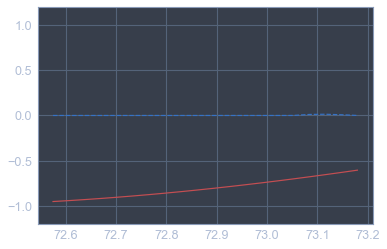

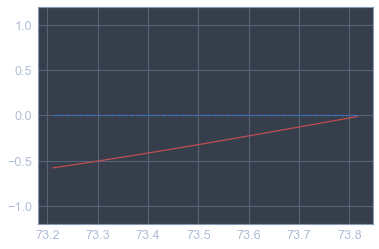

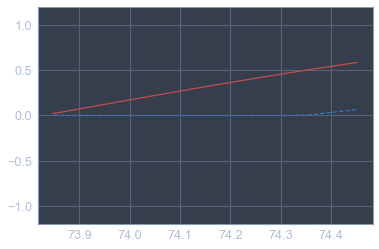

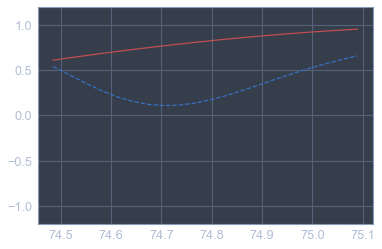

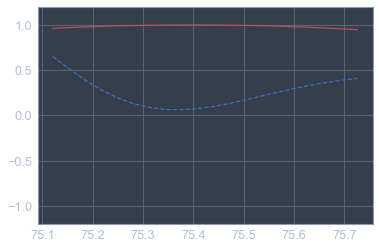

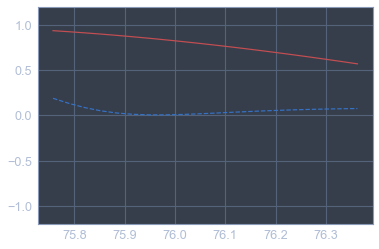

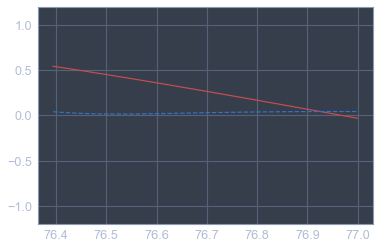

train cost:  0.2829668


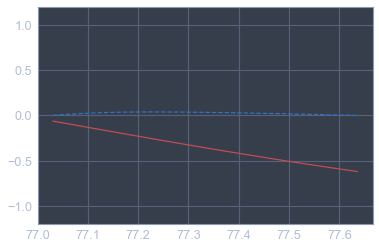

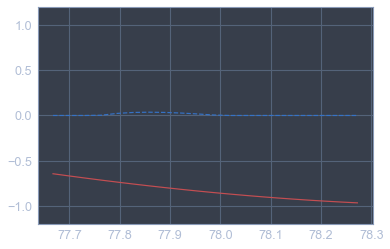

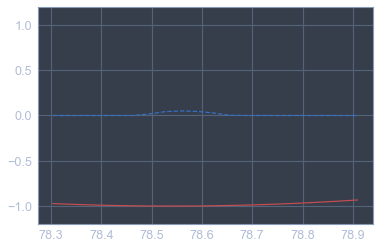

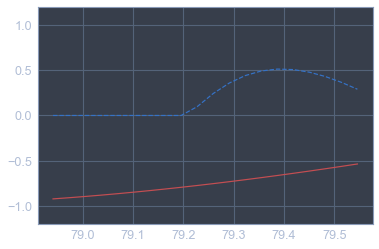

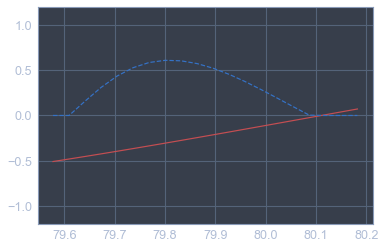

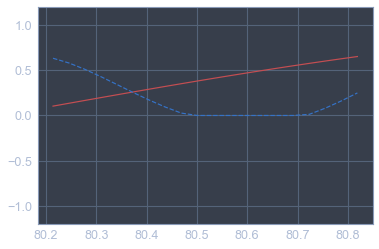

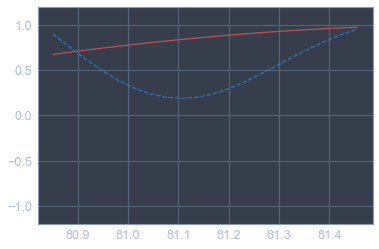

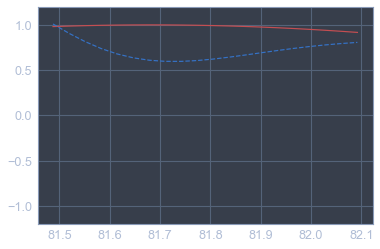

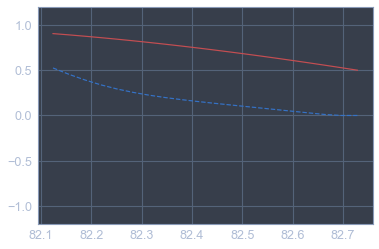

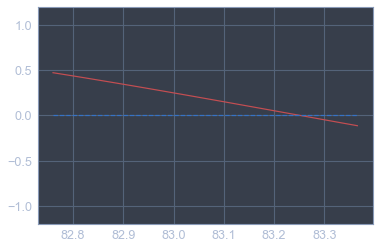

train cost:  0.3673909


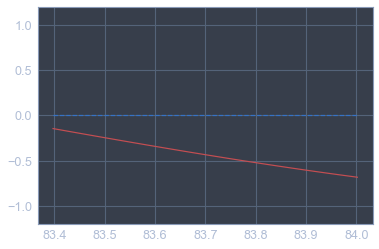

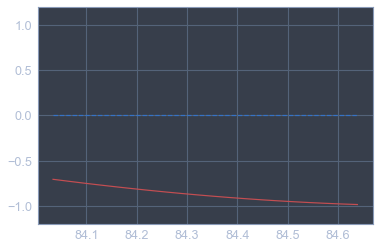

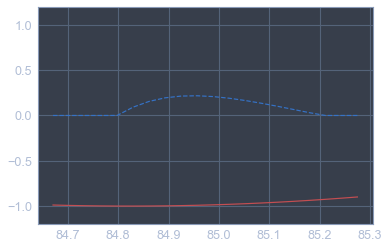

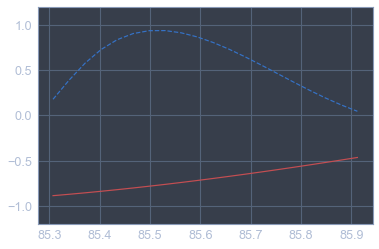

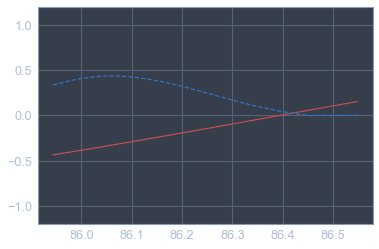

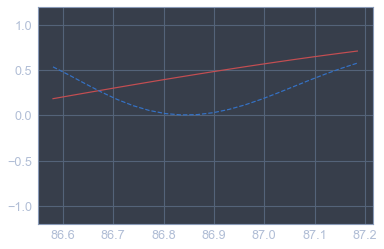

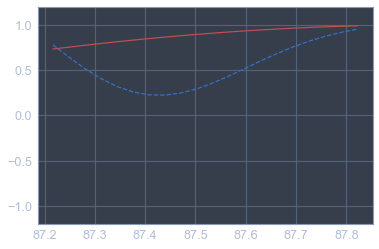

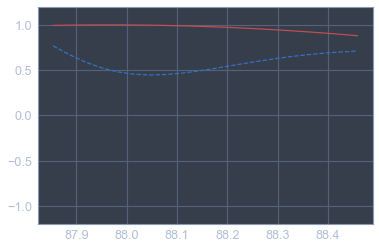

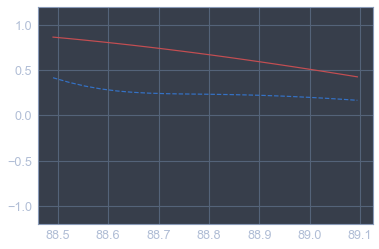

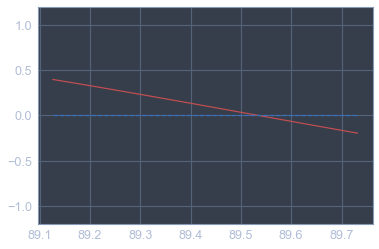

train cost:  0.2570115


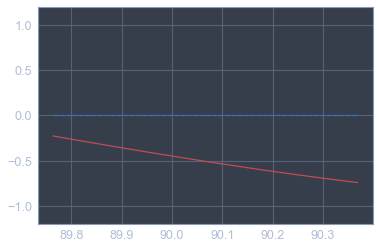

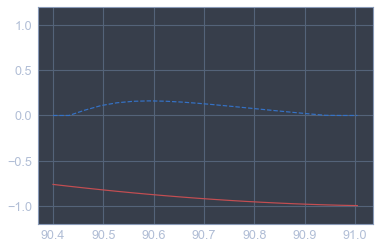

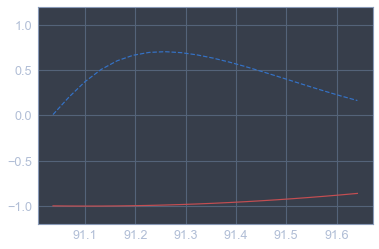

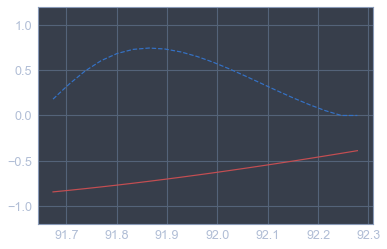

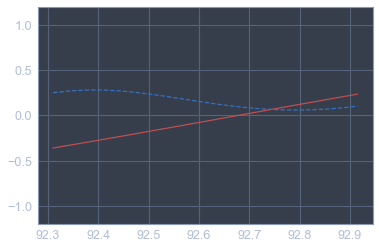

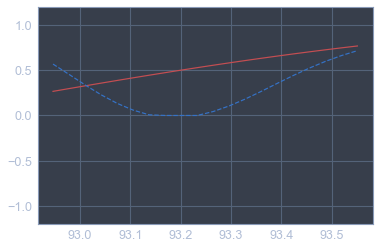

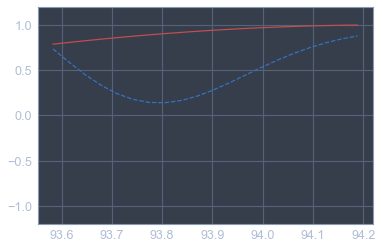

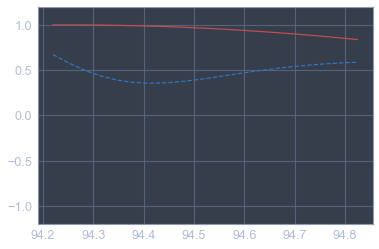

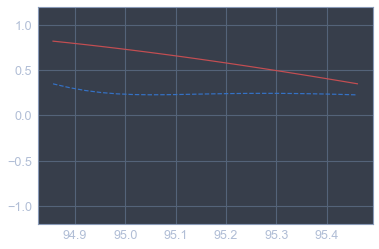

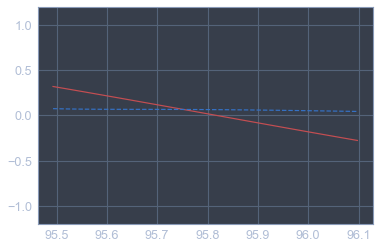

train cost:  0.25246105


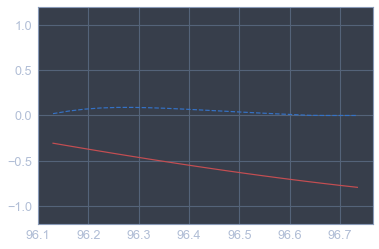

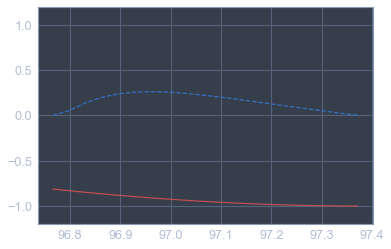

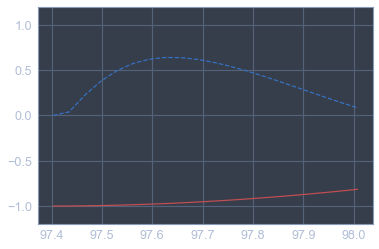

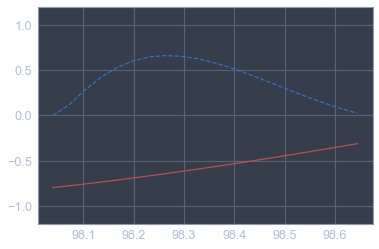

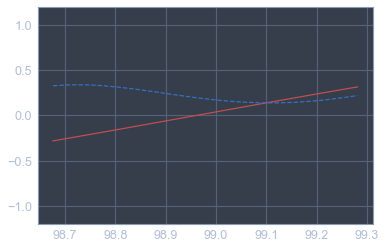

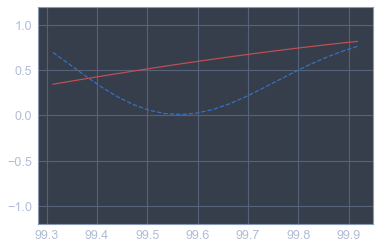

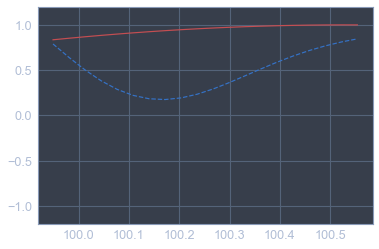

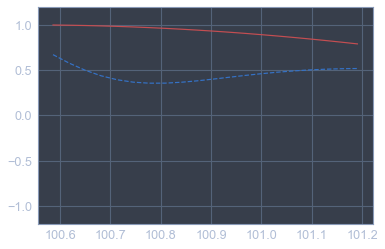

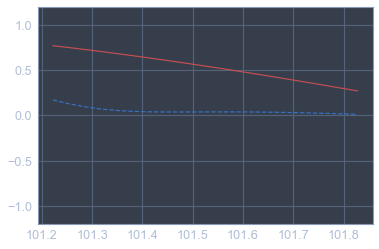

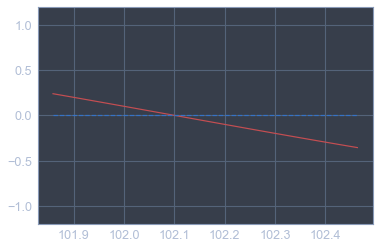

train cost:  0.24939337


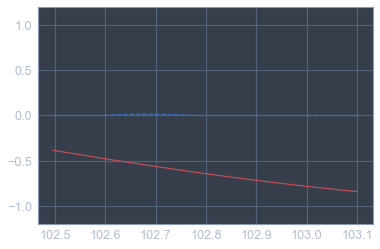

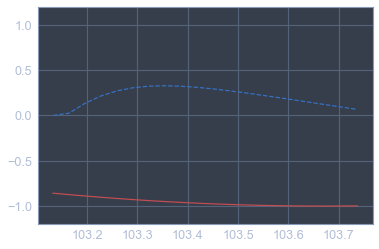

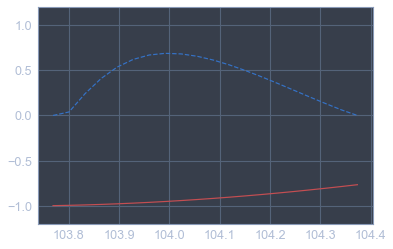

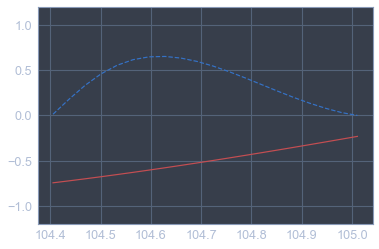

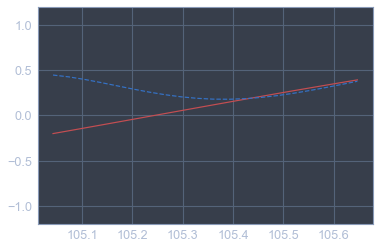

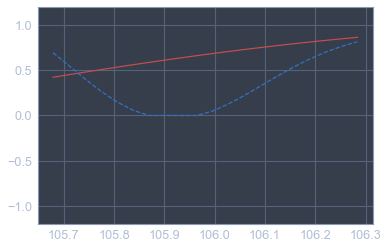

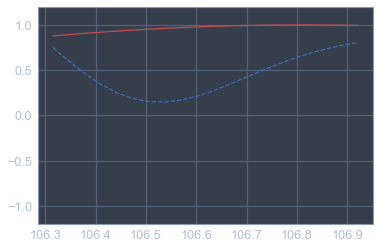

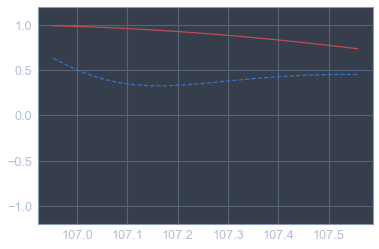

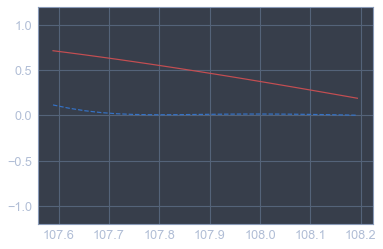

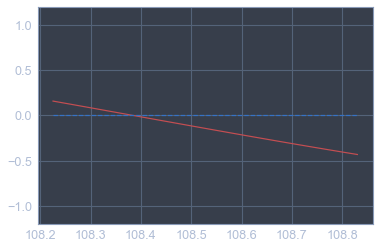

train cost:  0.24977471


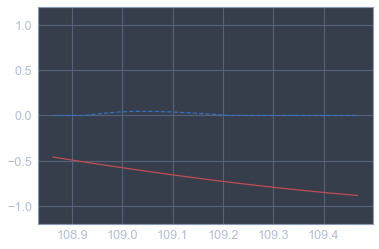

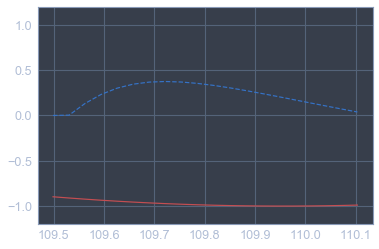

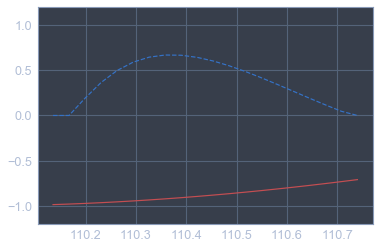

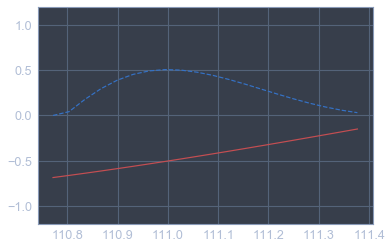

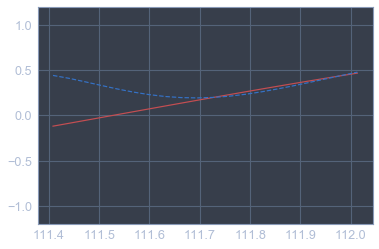

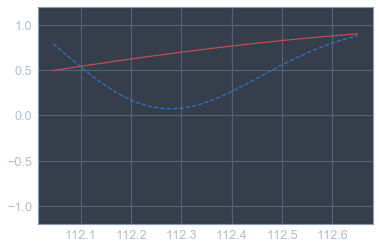

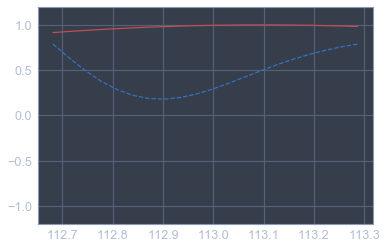

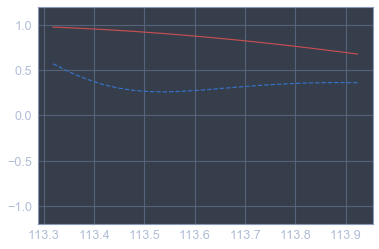

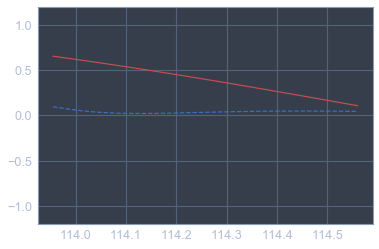

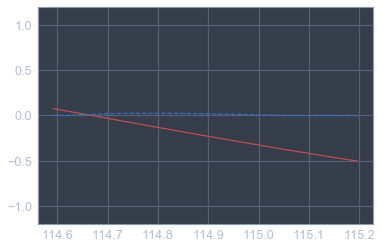

train cost:  0.25039664


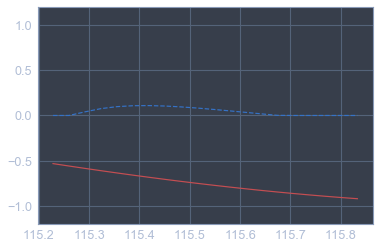

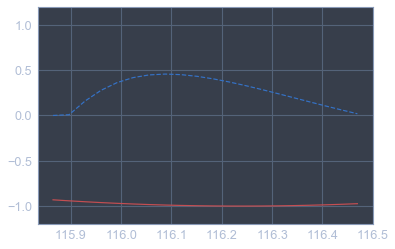

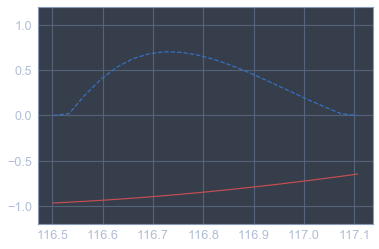

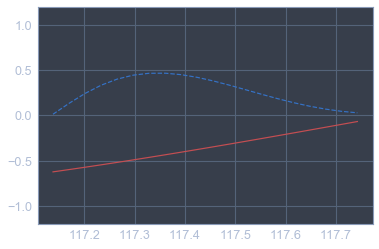

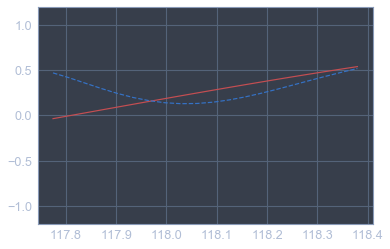

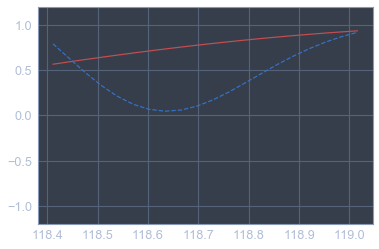

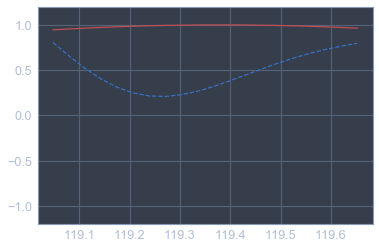

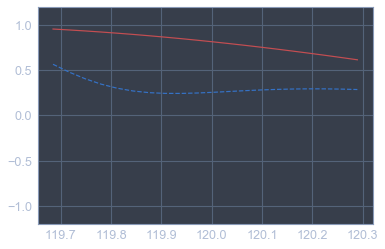

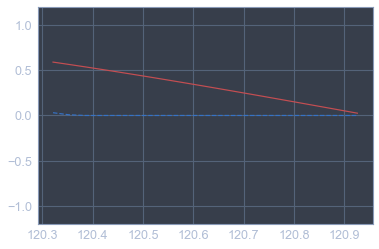

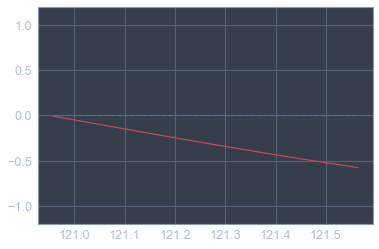

train cost:  0.25033003


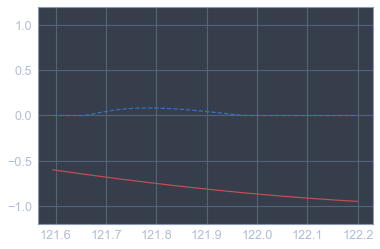

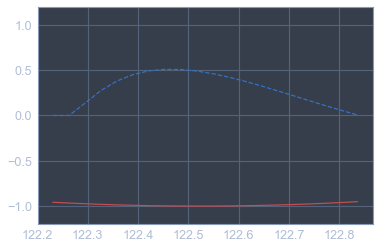

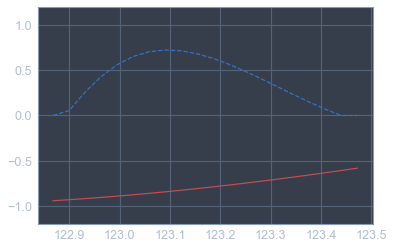

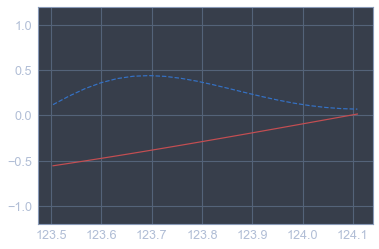

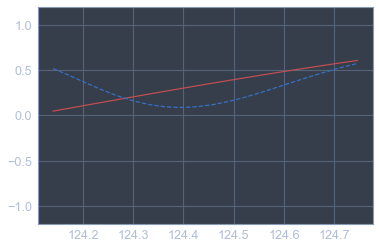

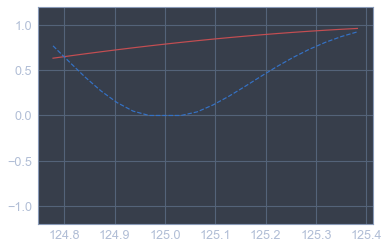

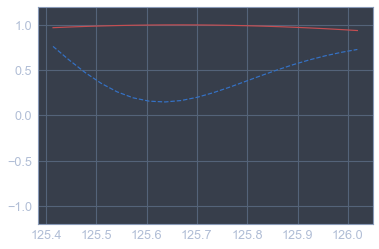

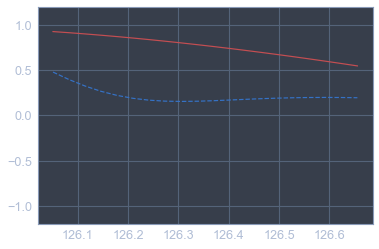

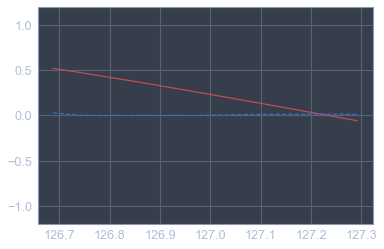

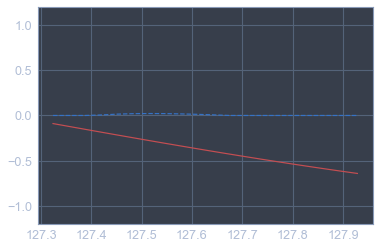

train cost:  0.25122973


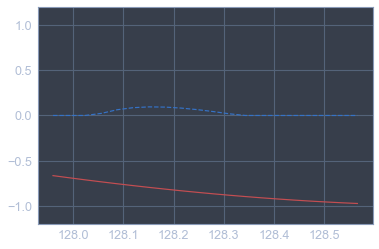

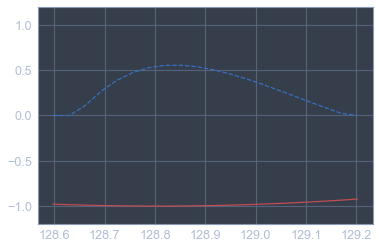

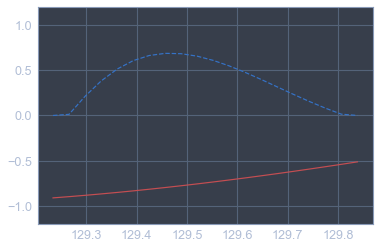

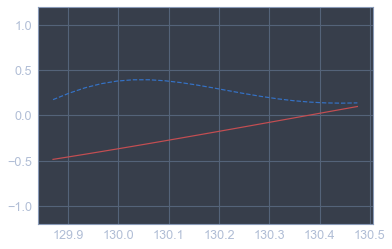

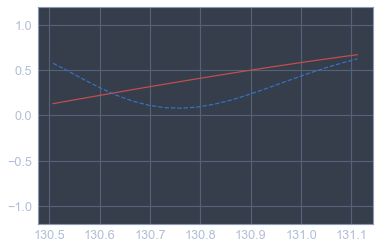

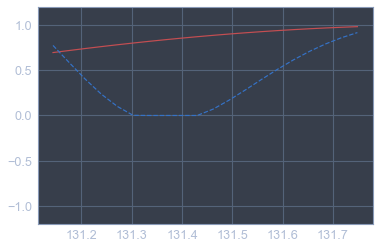

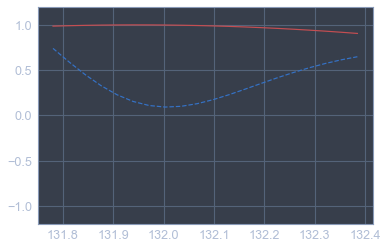

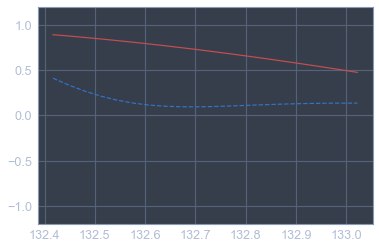

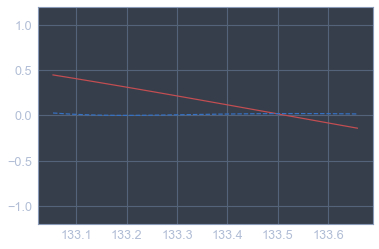

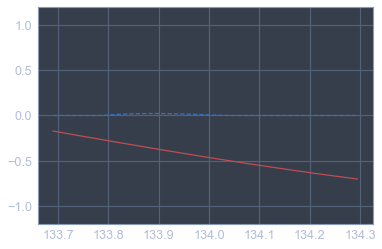

train cost:  0.25211546


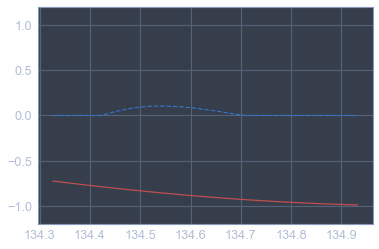

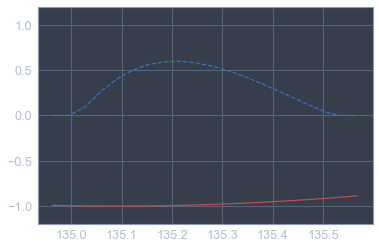

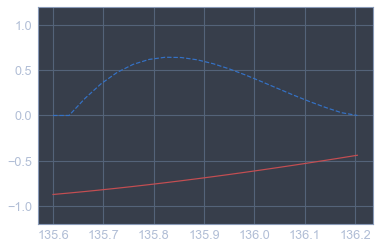

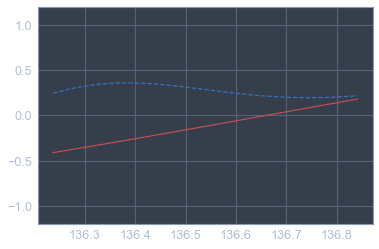

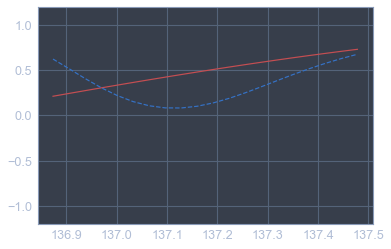

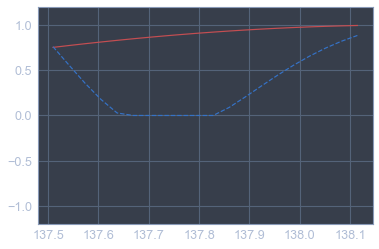

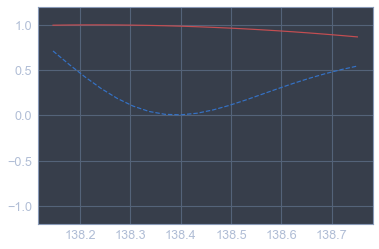

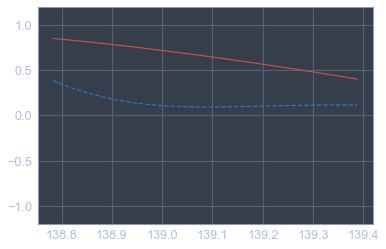

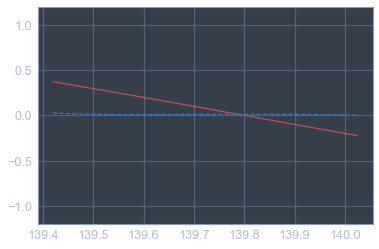

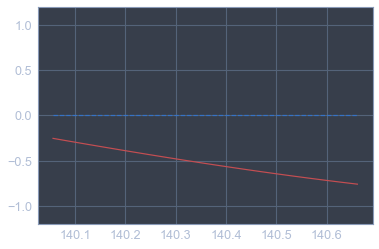

train cost:  0.25372756


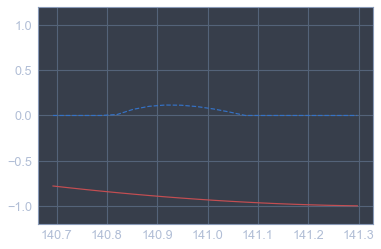

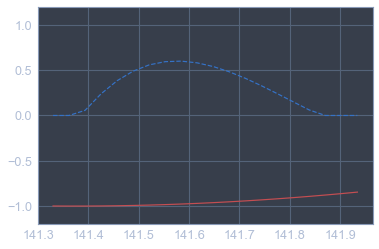

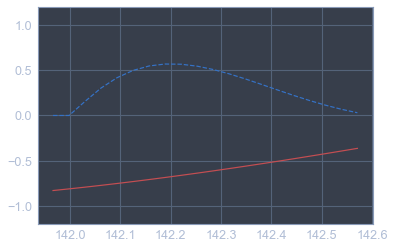

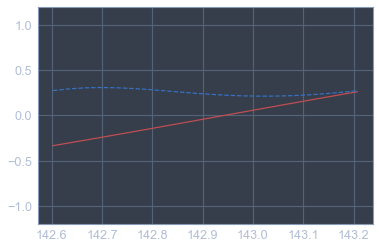

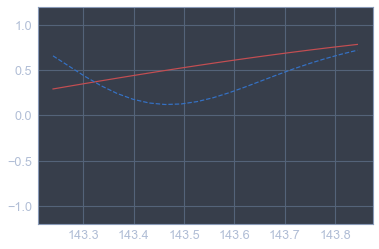

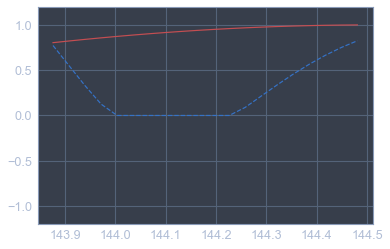

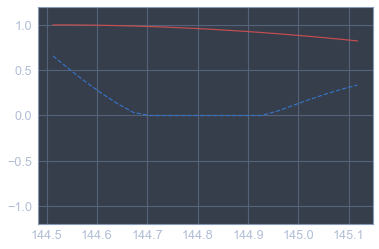

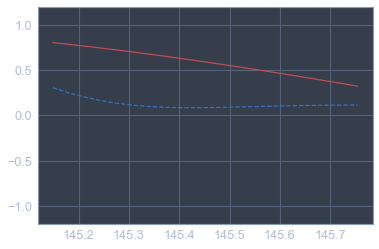

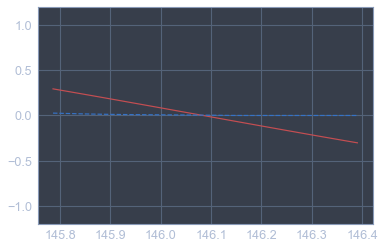

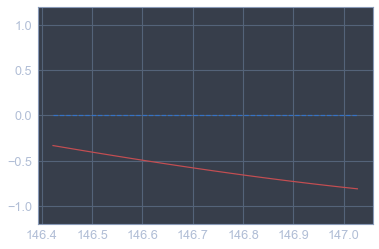

train cost:  0.25640067


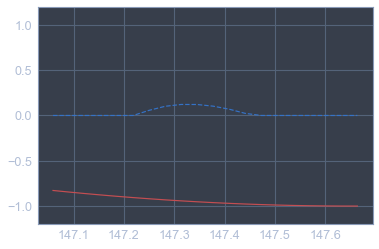

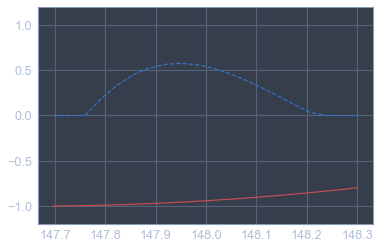

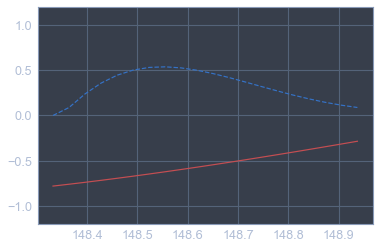

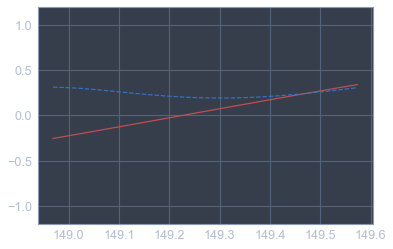

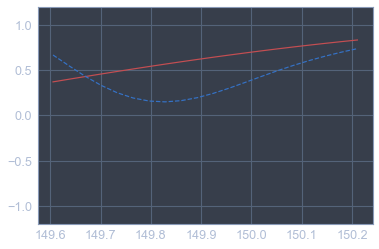

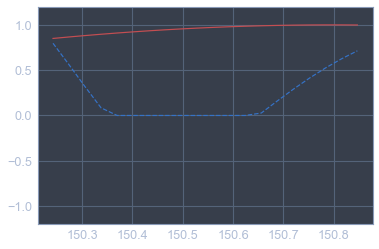

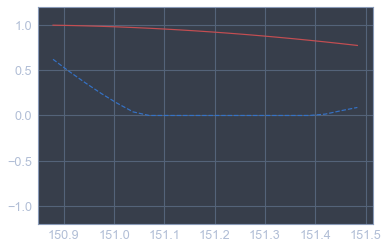

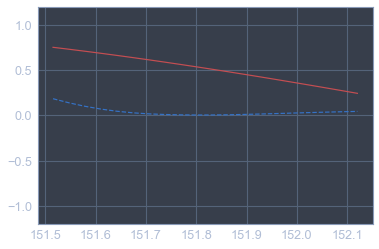

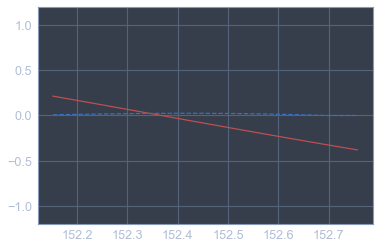

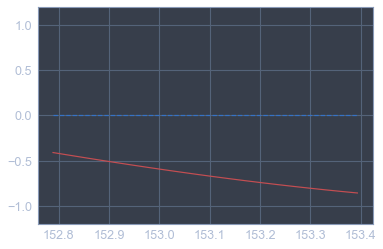

train cost:  0.26191708


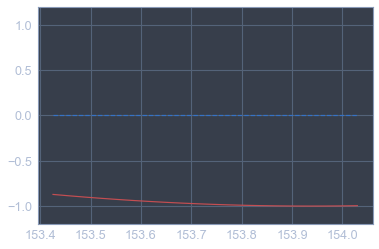

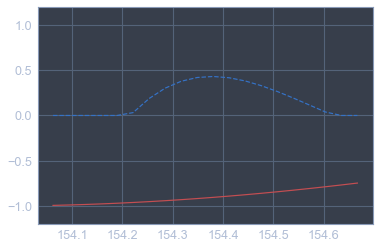

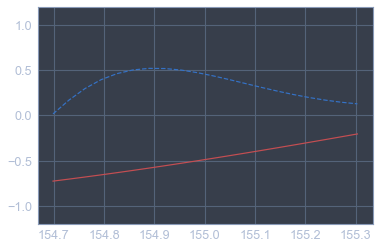

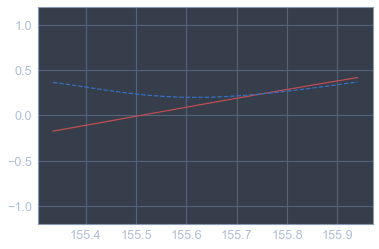

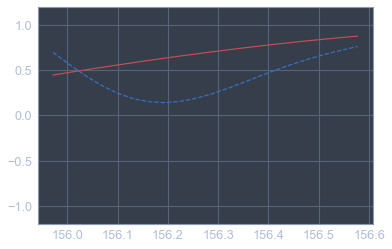

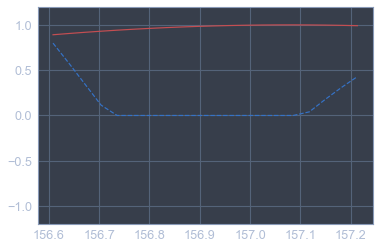

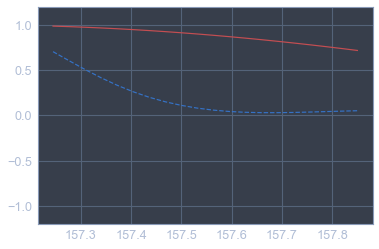

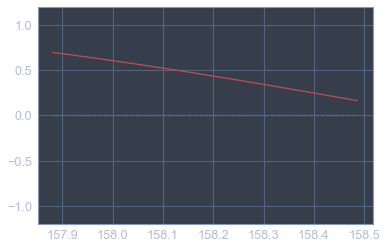

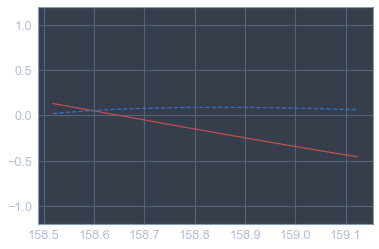

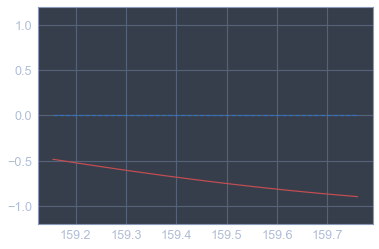

train cost:  0.26577342


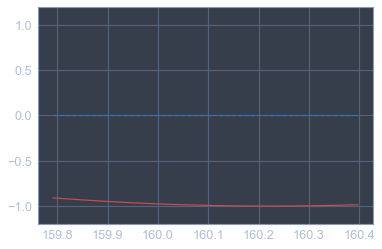

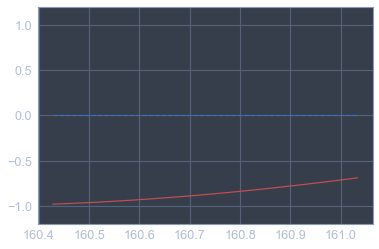

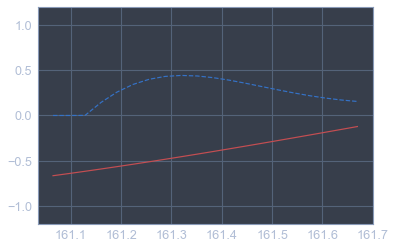

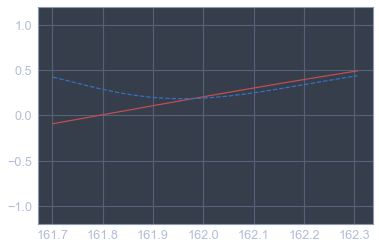

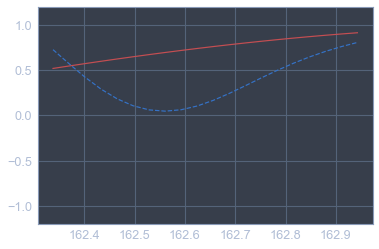

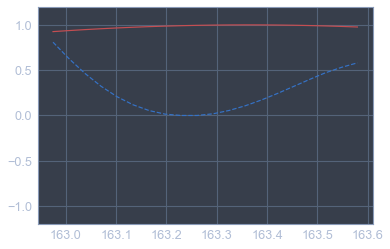

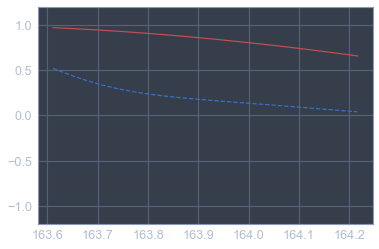

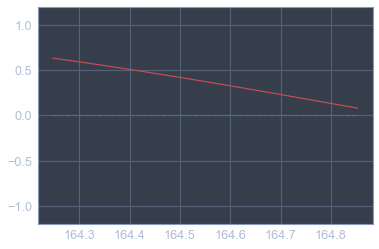

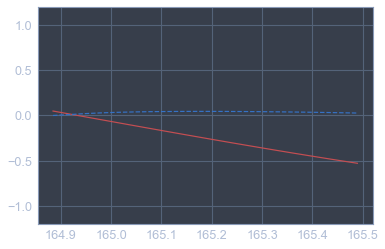

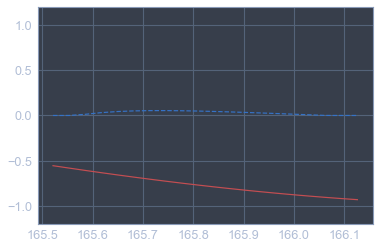

train cost:  0.27269468


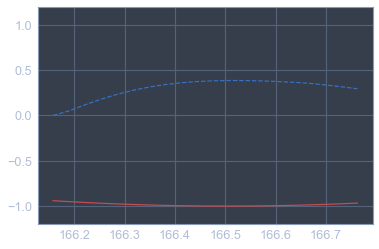

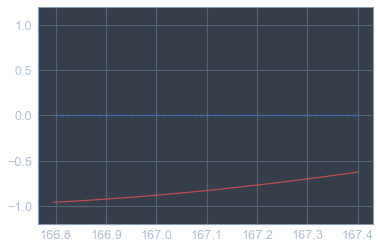

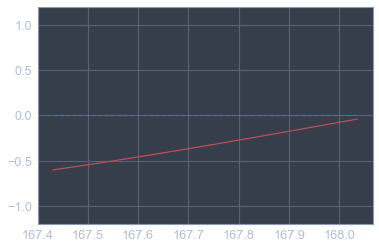

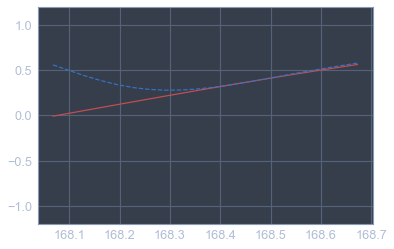

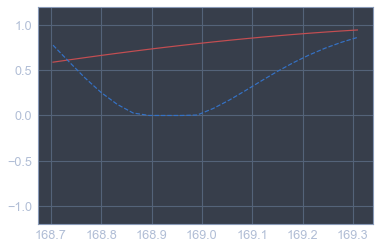

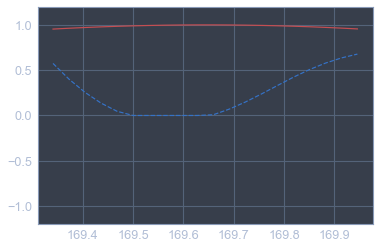

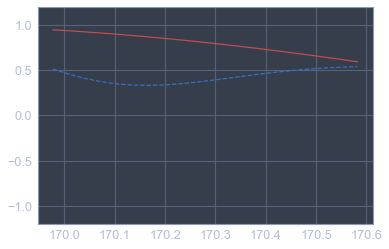

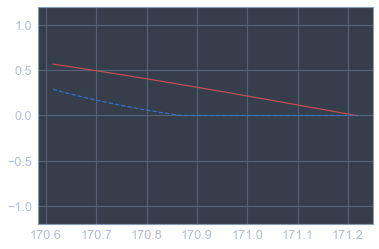

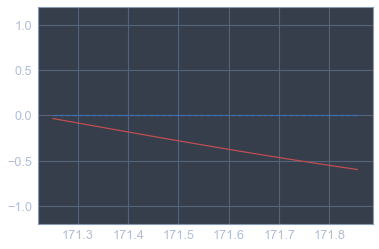

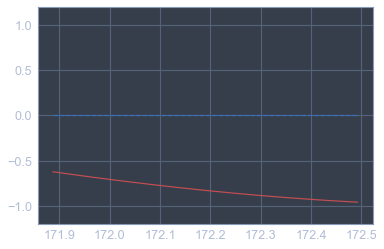

train cost:  0.2716486


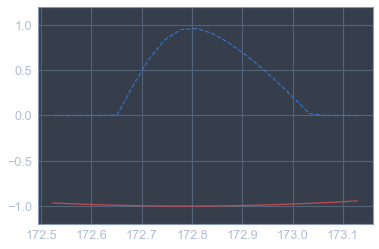

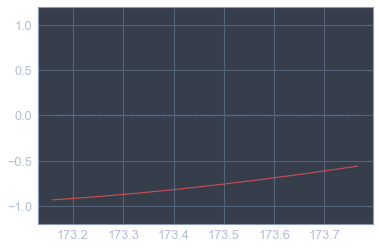

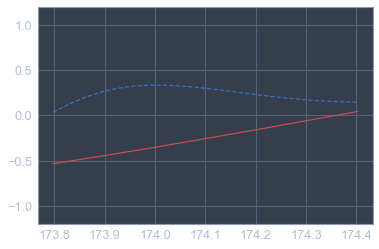

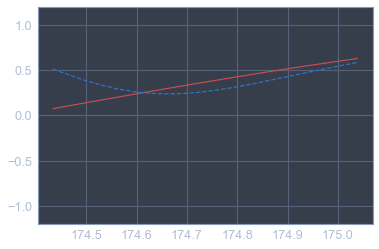

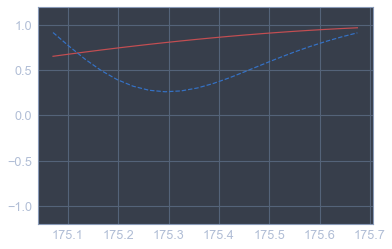

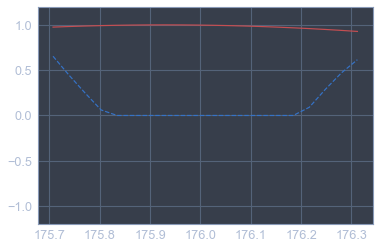

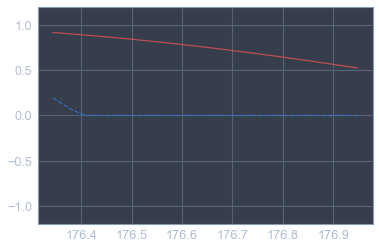

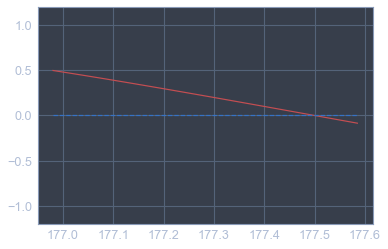

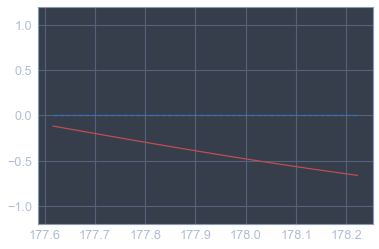

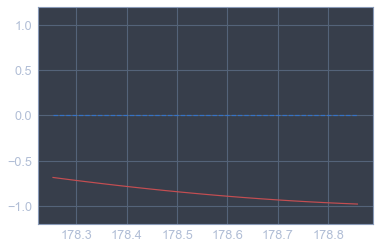

train cost:  0.28921628


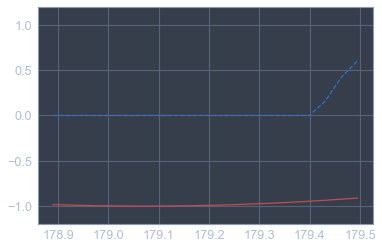

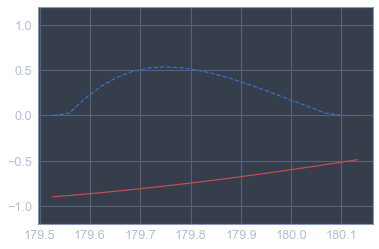

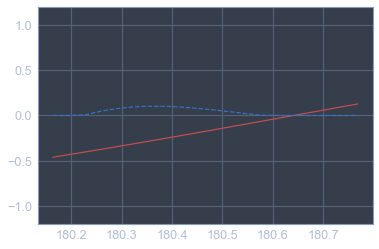

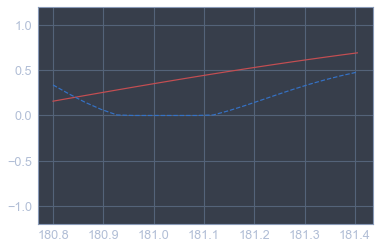

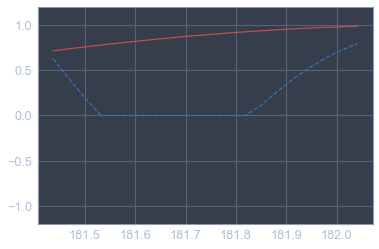

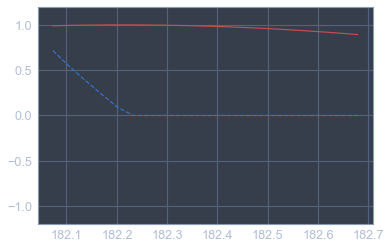

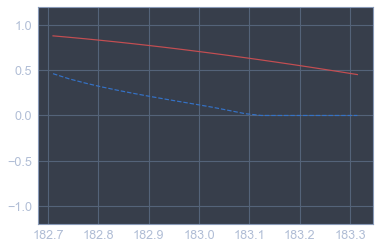

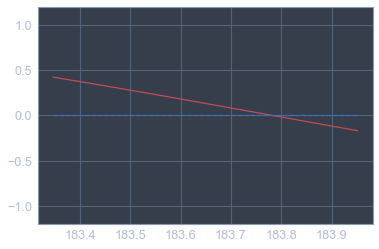

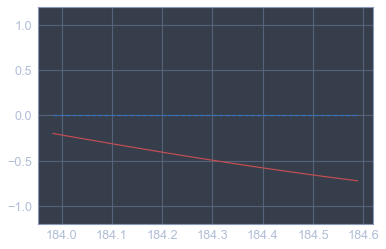

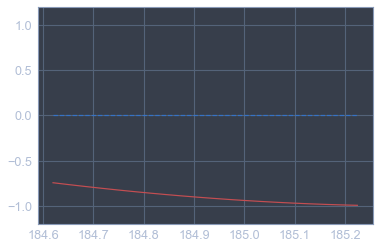

train cost:  0.28604606


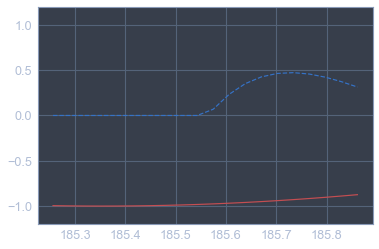

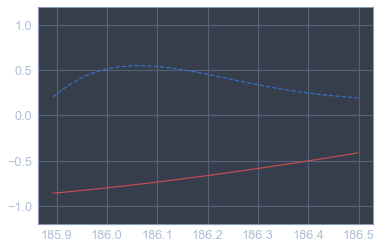

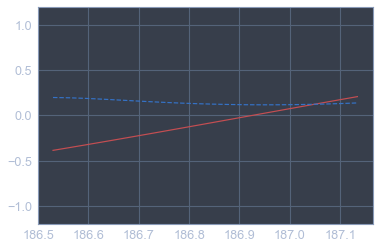

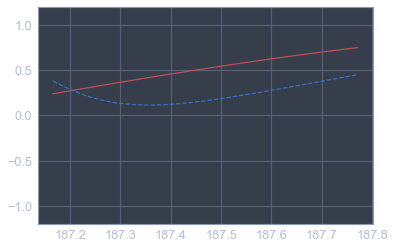

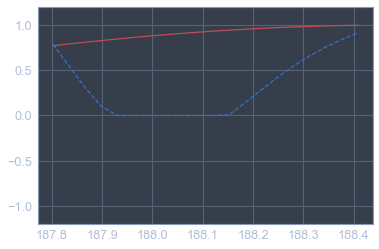

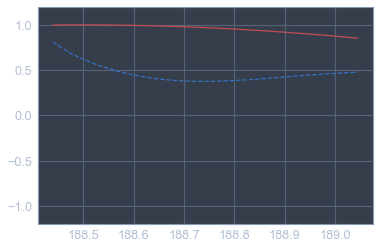

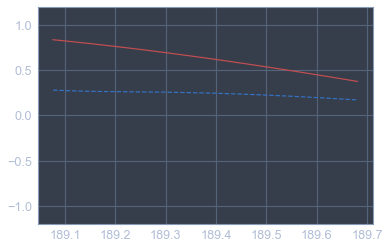

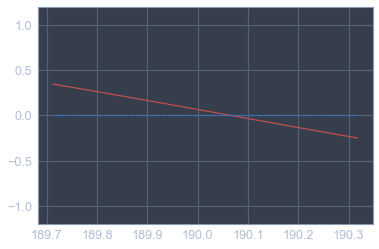

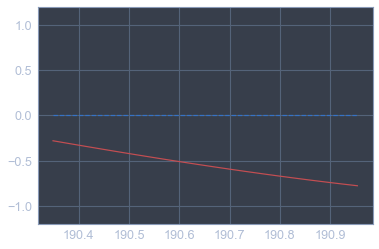

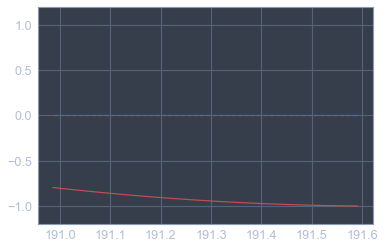

train cost:  0.27520955


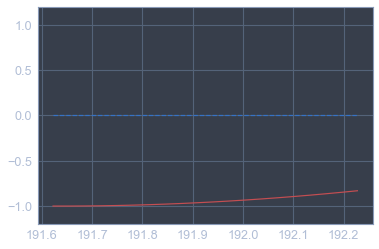

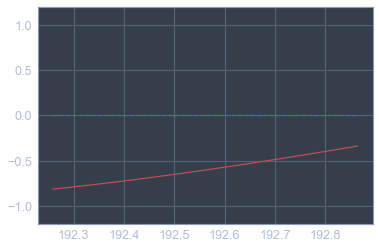

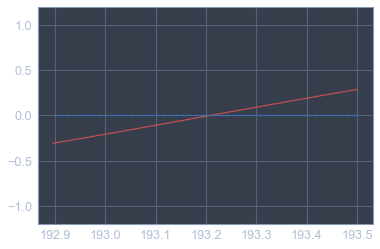

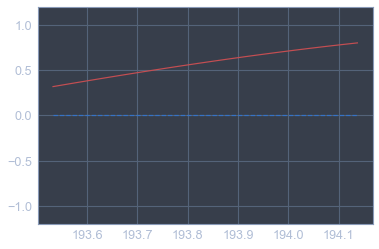

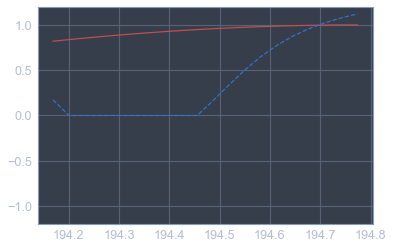

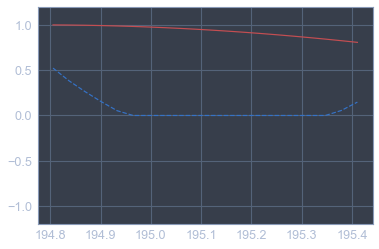

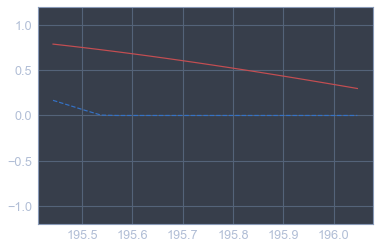

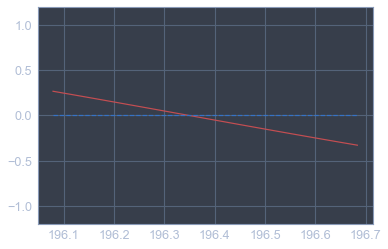

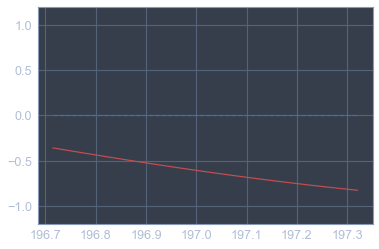

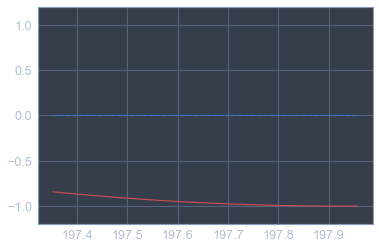

train cost:  0.32045203


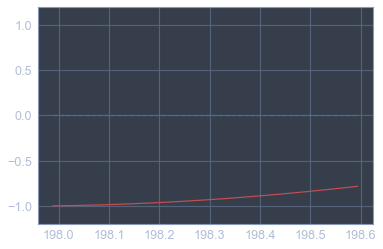

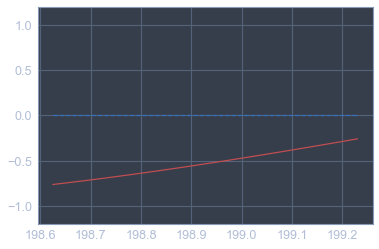

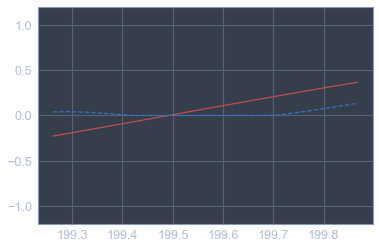

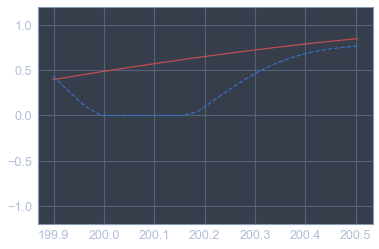

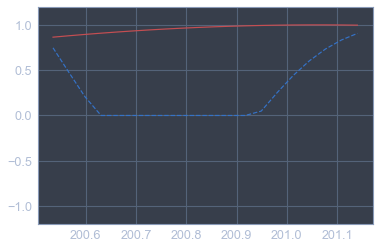

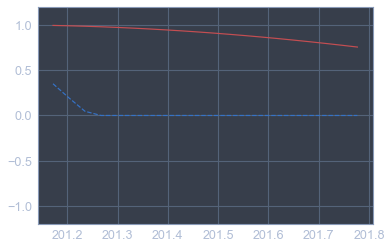

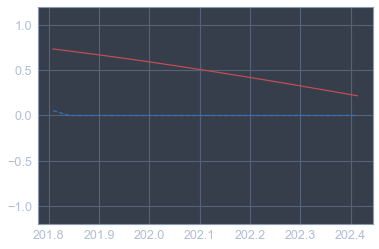

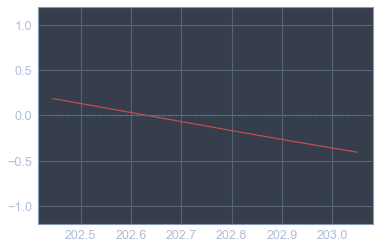

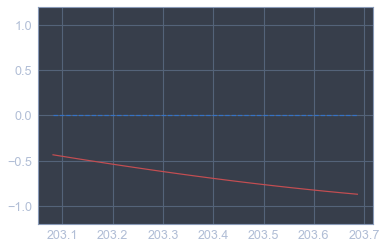

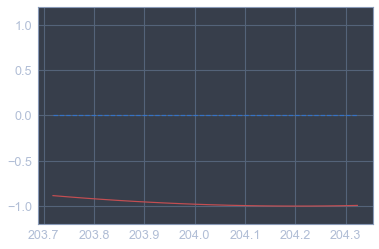

train cost:  0.4074575


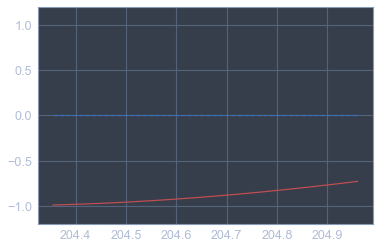

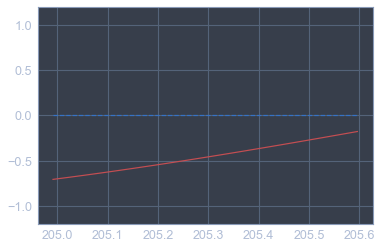

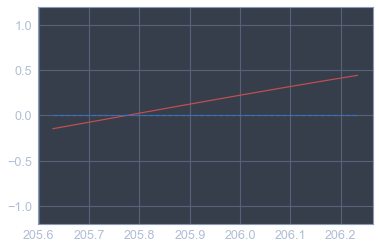

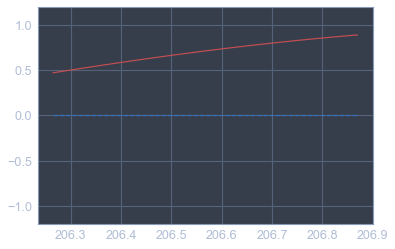

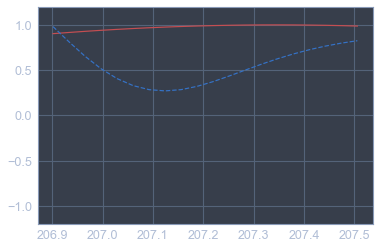

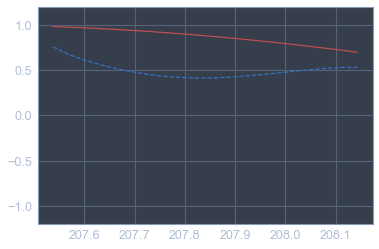

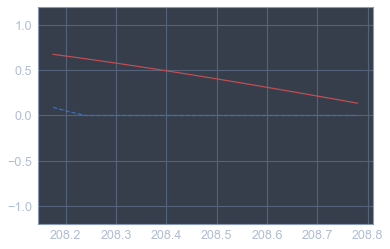

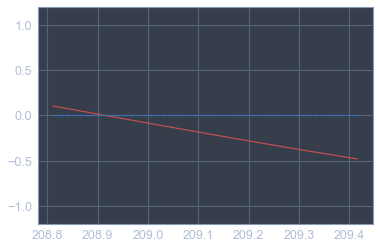

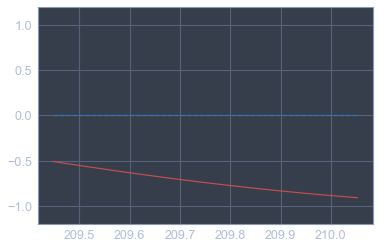

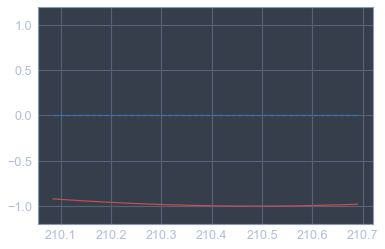

train cost:  0.34183252


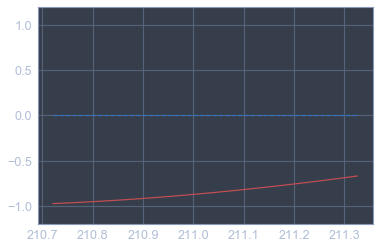

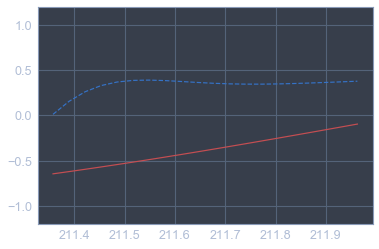

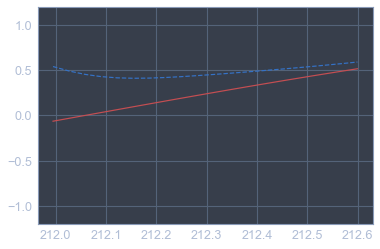

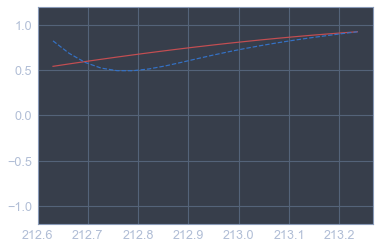

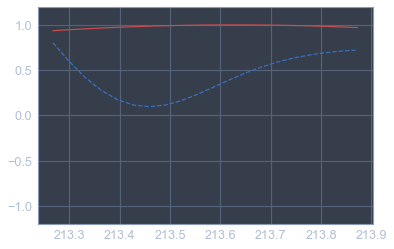

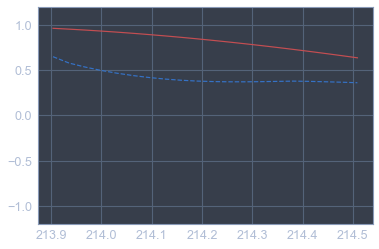

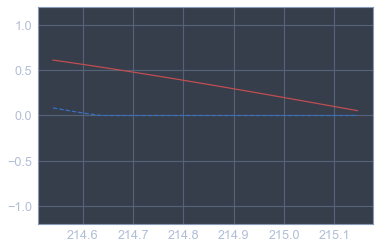

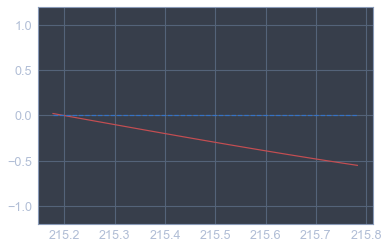

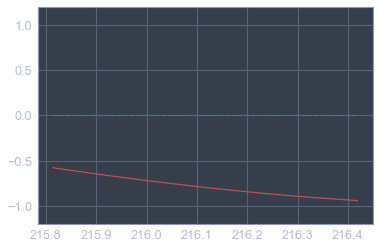

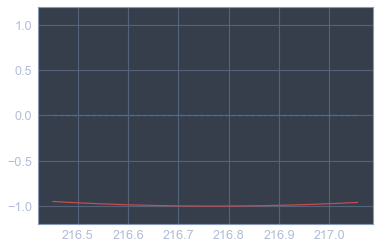

train cost:  0.27213508


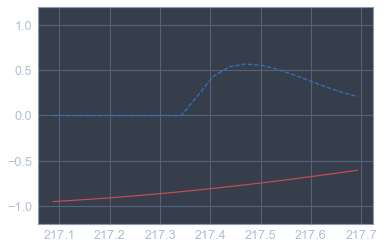

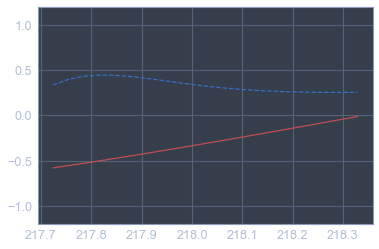

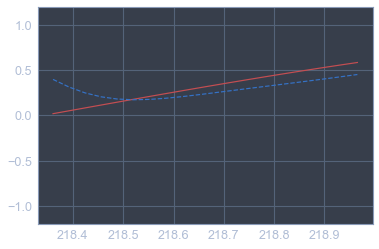

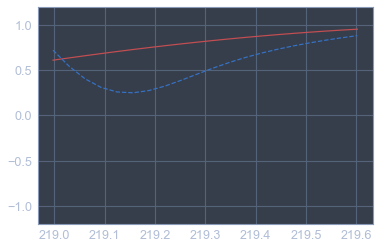

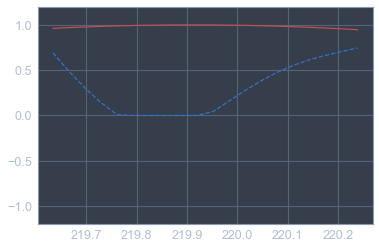

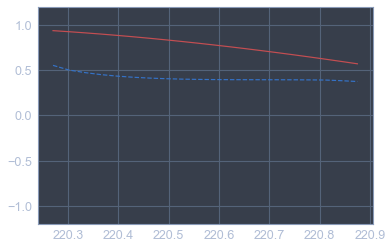

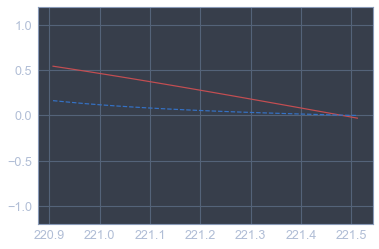

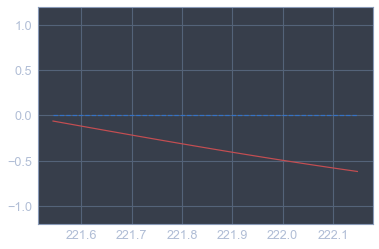

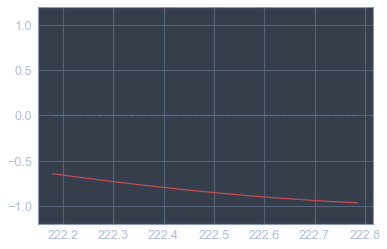

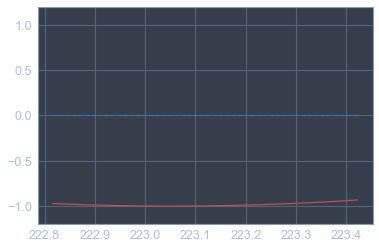

train cost:  0.2737819


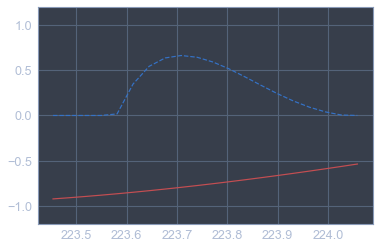

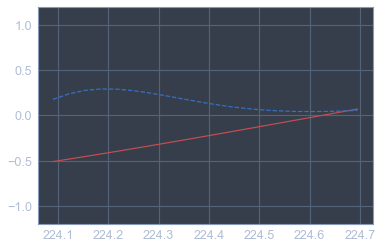

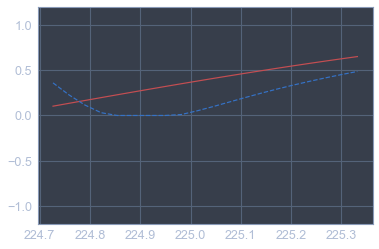

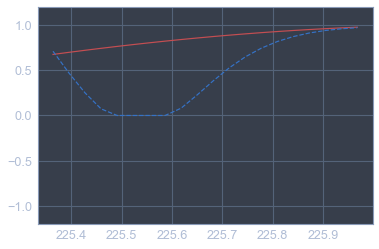

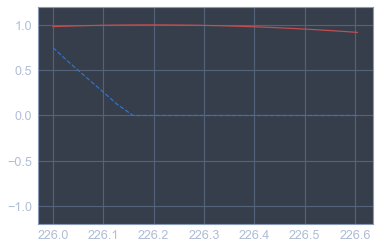

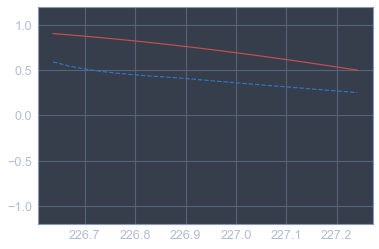

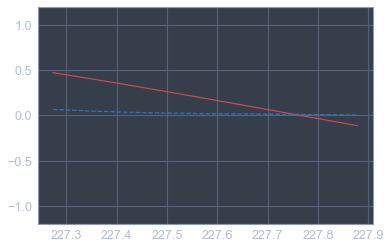

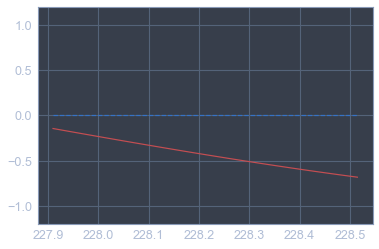

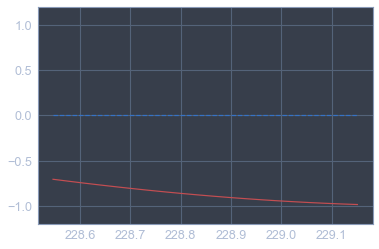

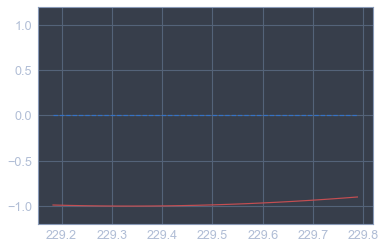

train cost:  0.2741632


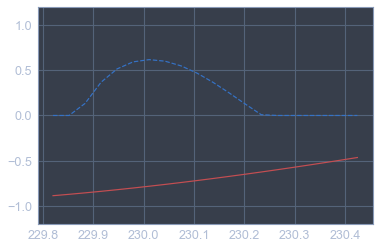

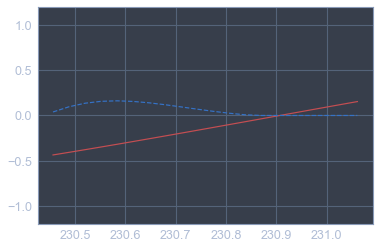

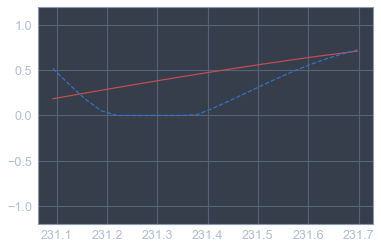

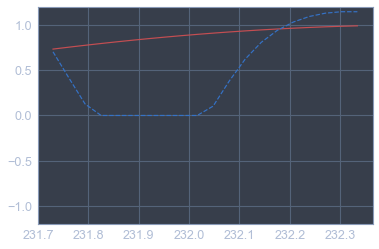

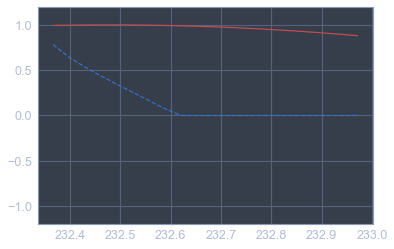

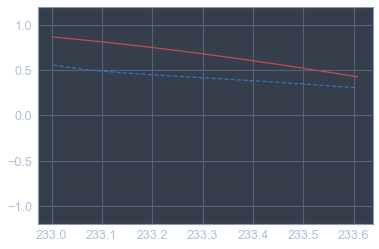

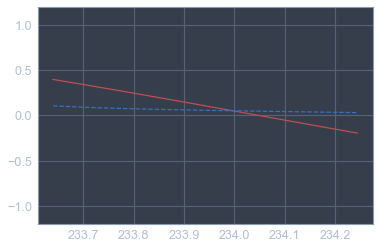

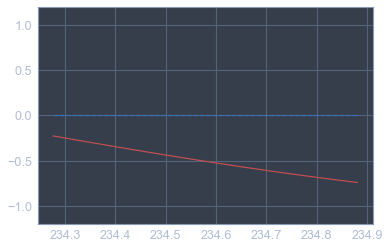

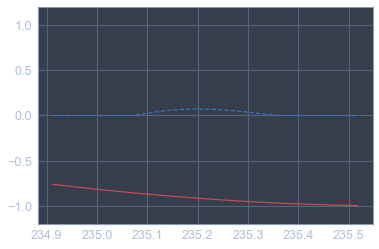

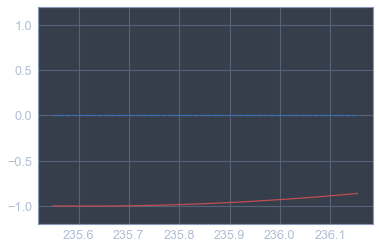

train cost:  0.26378548


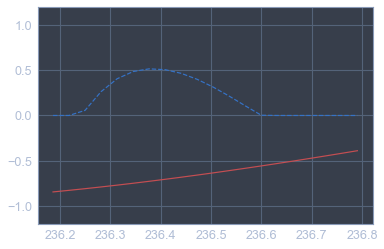

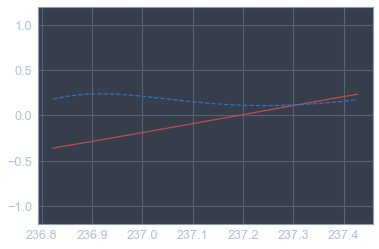

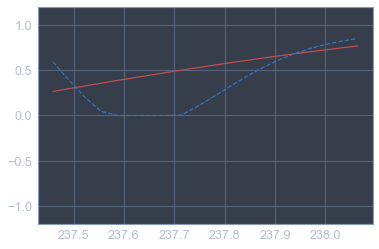

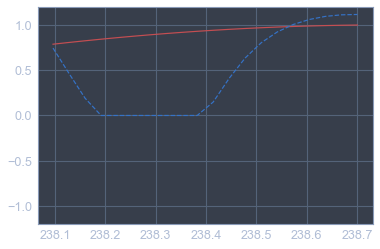

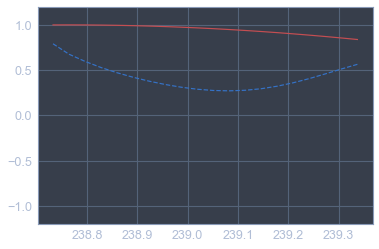

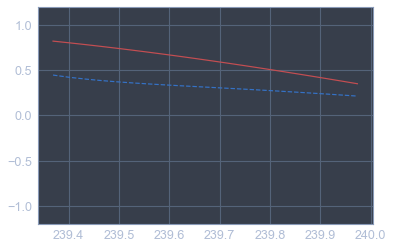

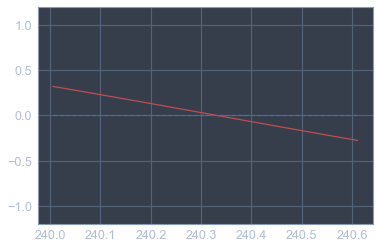

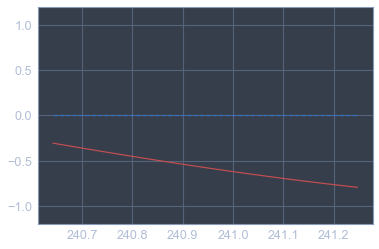

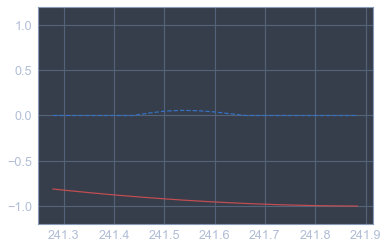

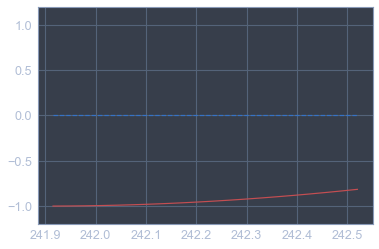

train cost:  0.26293314


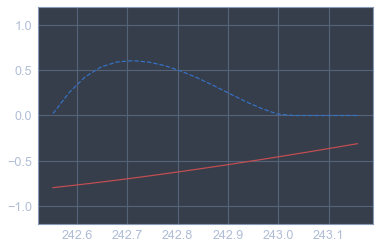

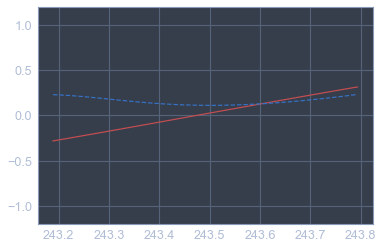

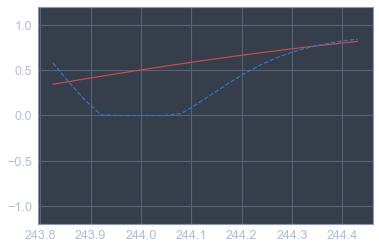

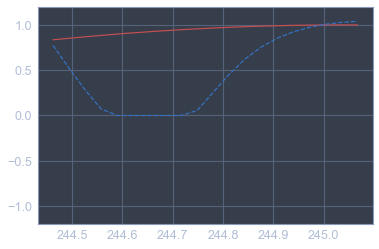

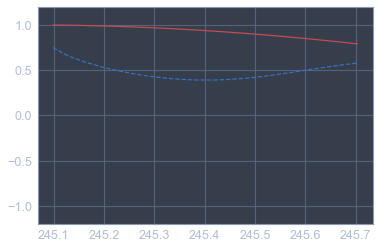

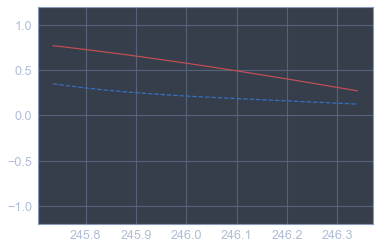

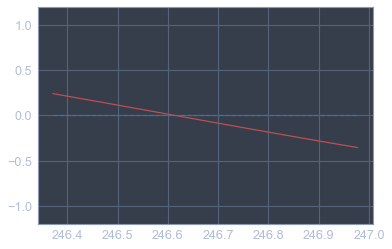

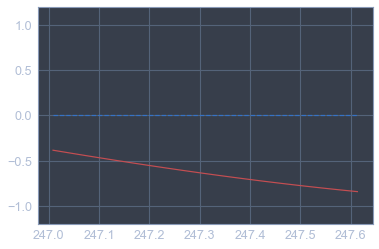

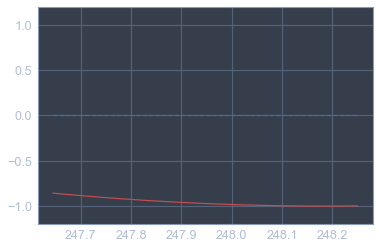

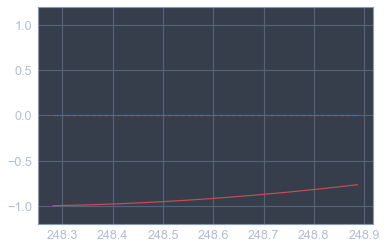

train cost:  0.2646254


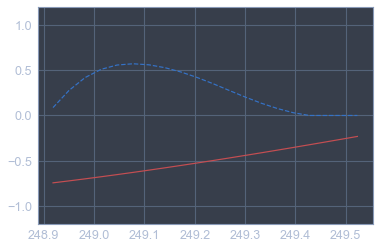

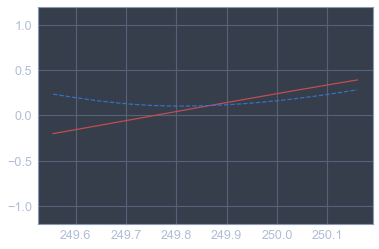

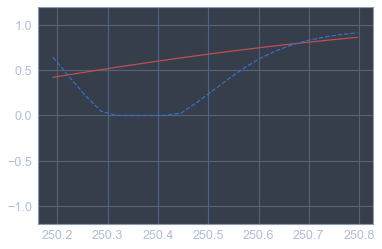

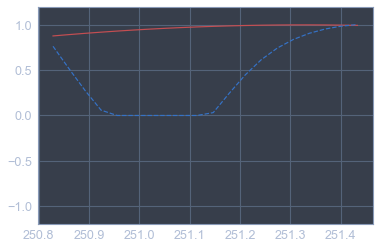

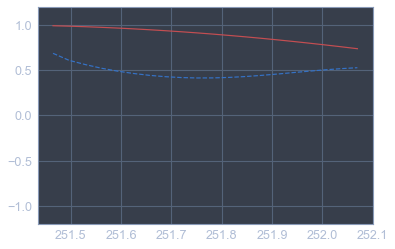

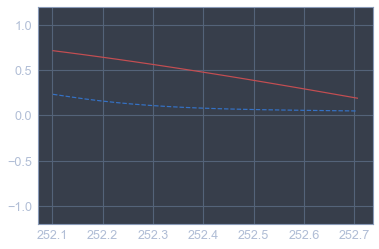

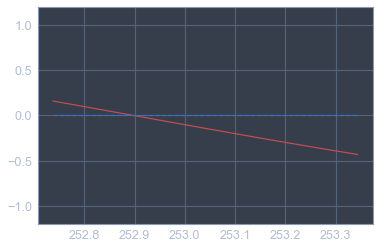

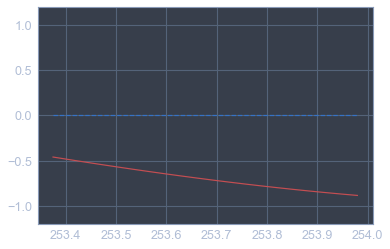

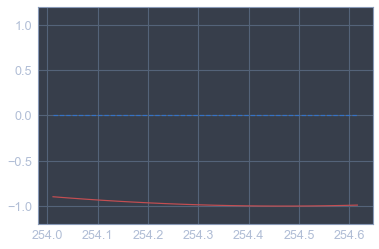

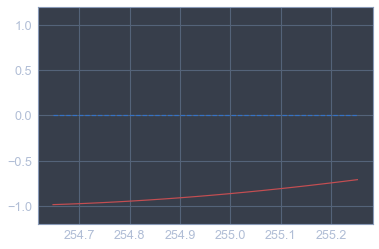

train cost:  0.26355937


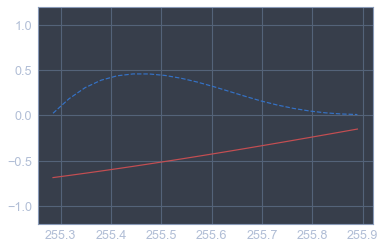

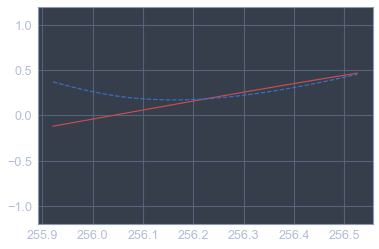

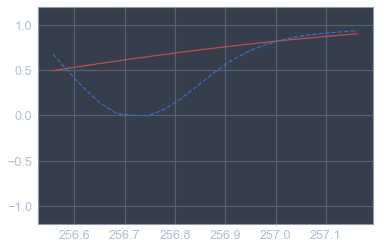

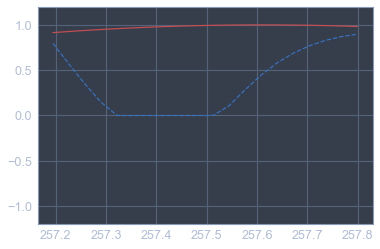

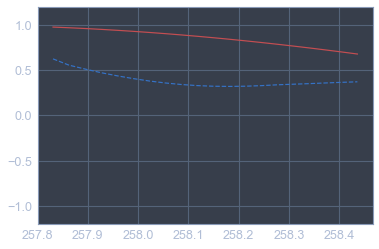

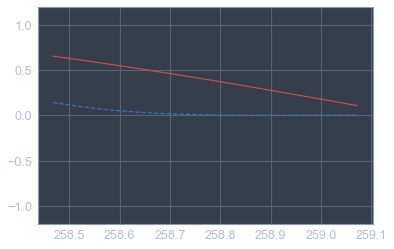

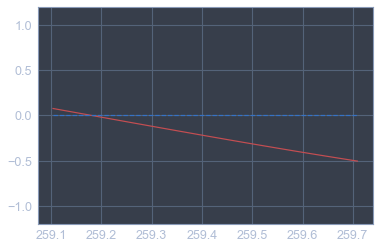

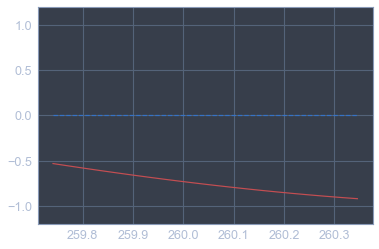

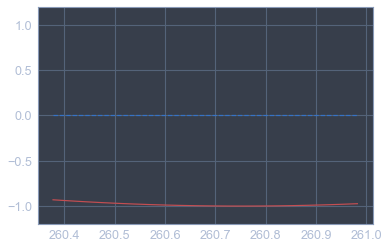

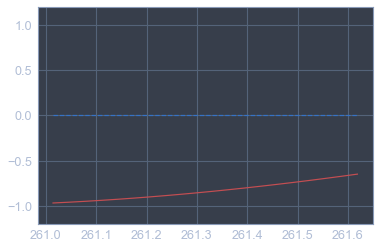

train cost:  0.26048303


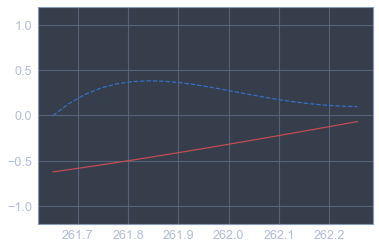

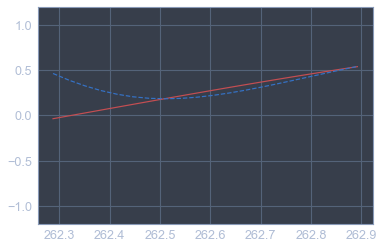

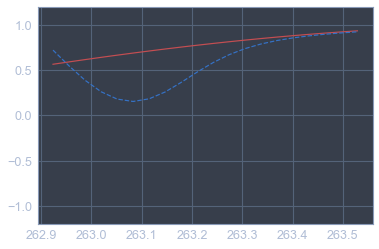

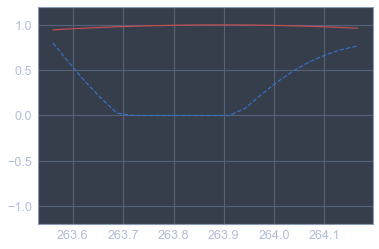

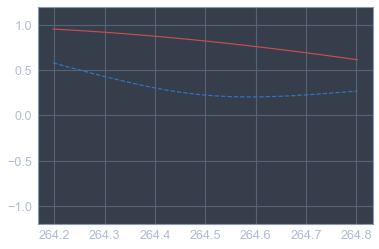

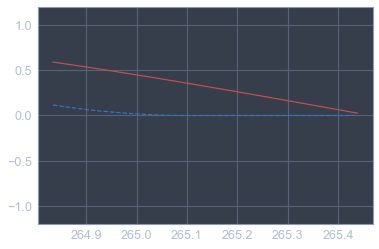

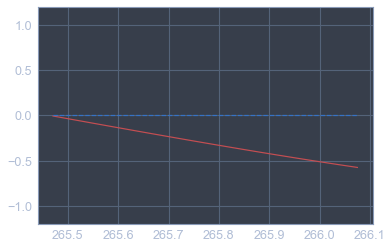

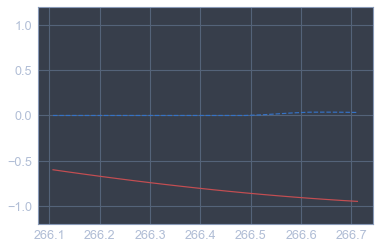

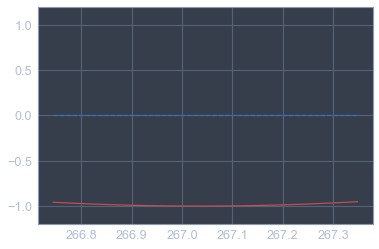

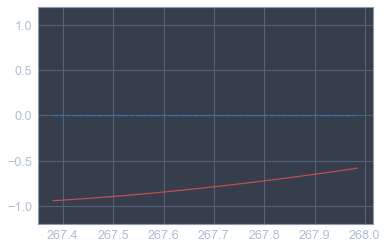

train cost:  0.25995198


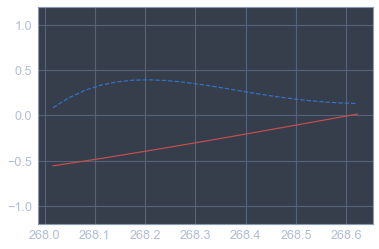

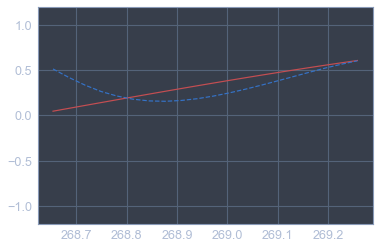

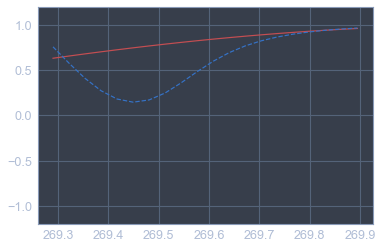

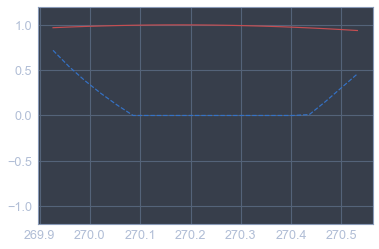

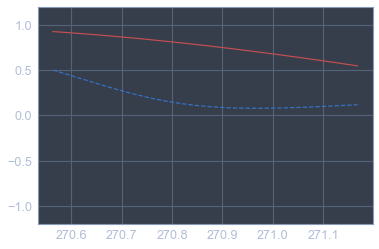

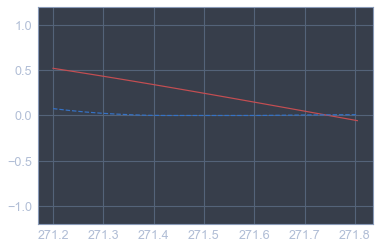

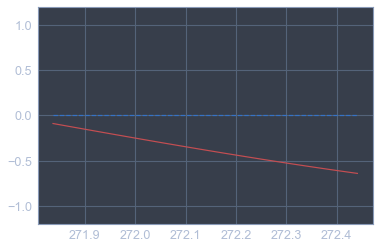

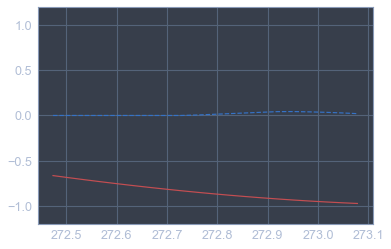

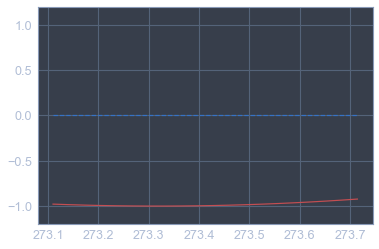

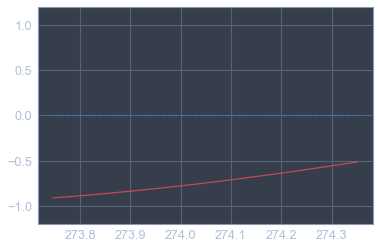

train cost:  0.26145563


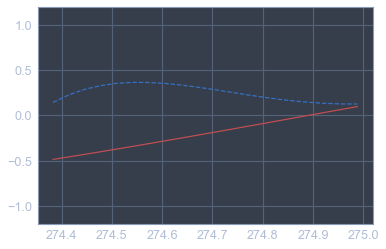

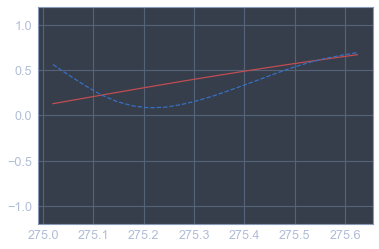

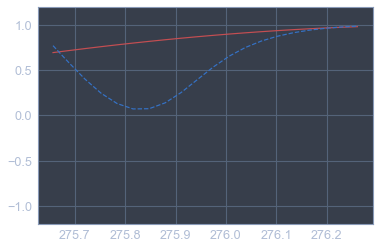

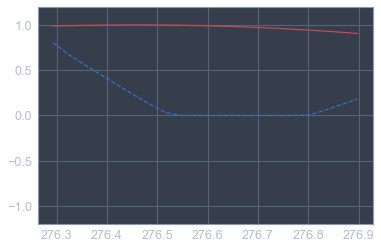

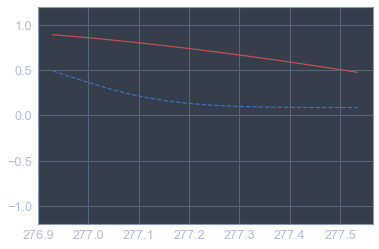

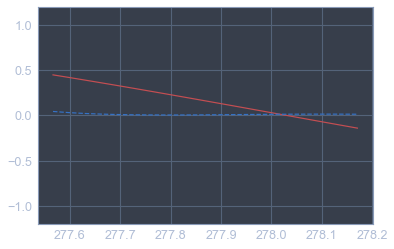

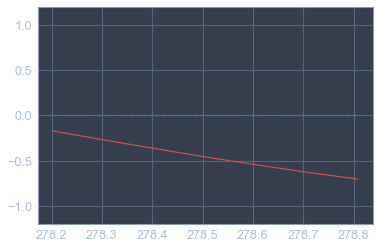

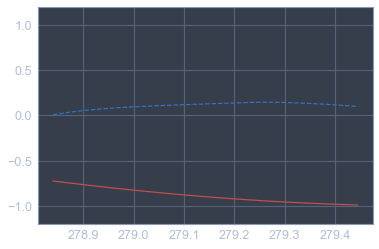

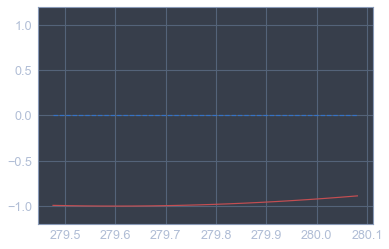

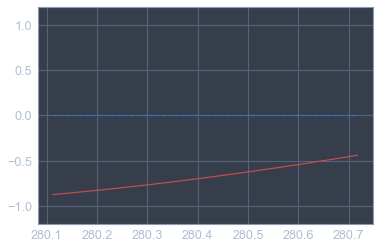

train cost:  0.25954497


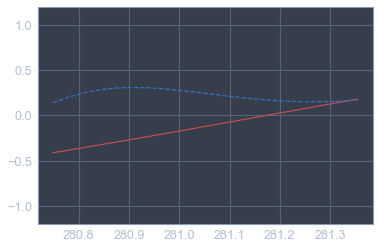

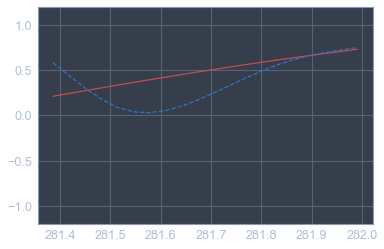

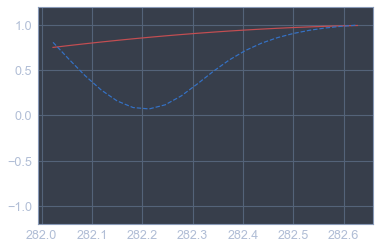

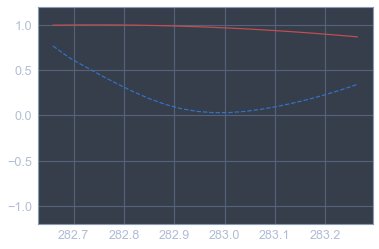

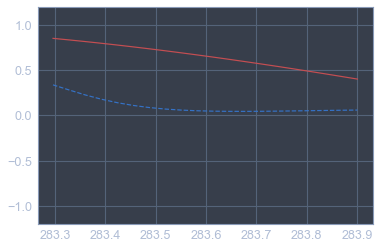

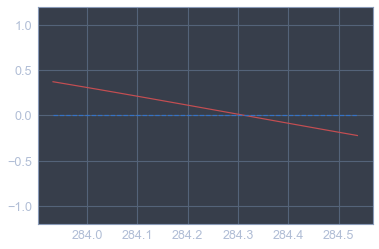

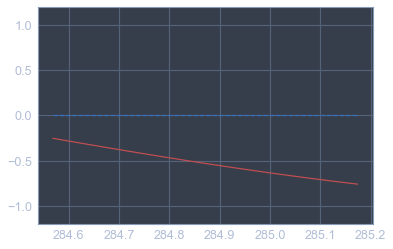

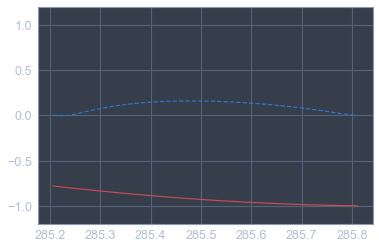

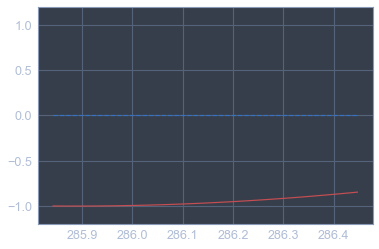

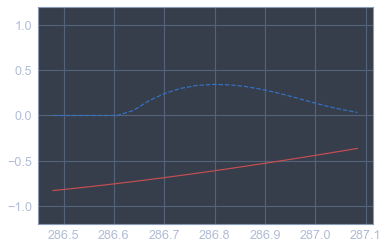

train cost:  0.2557337


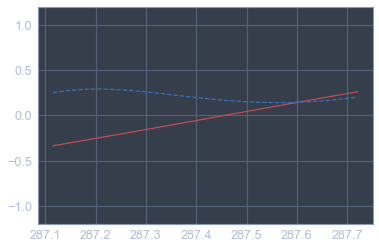

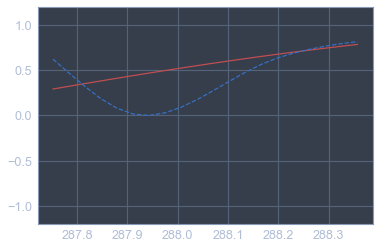

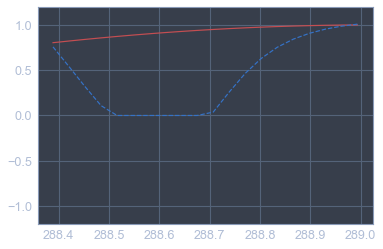

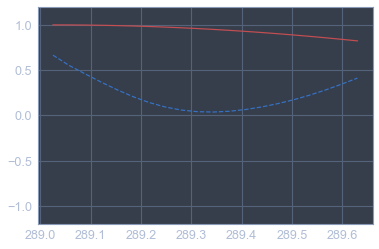

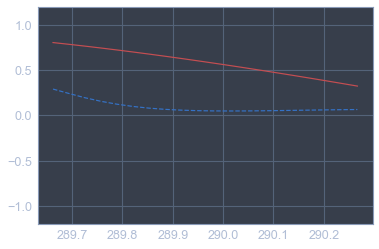

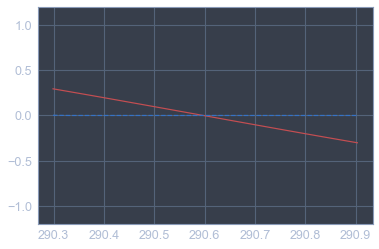

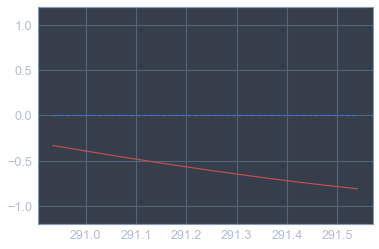

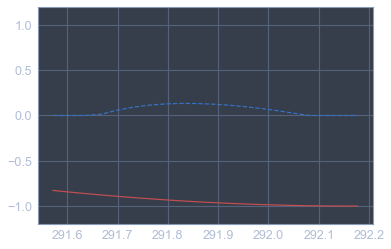

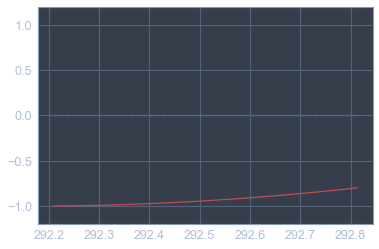

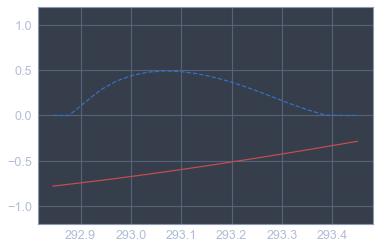

train cost:  0.25570294


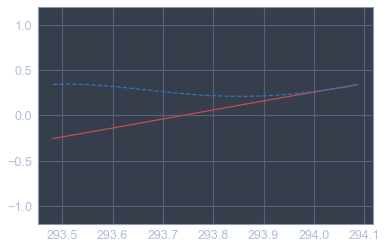

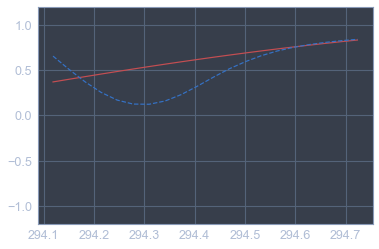

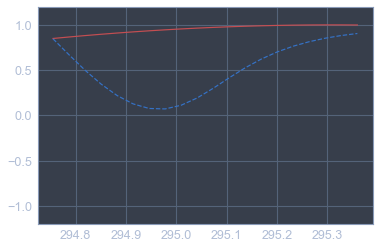

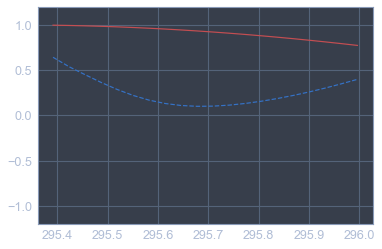

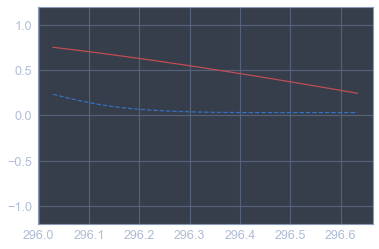

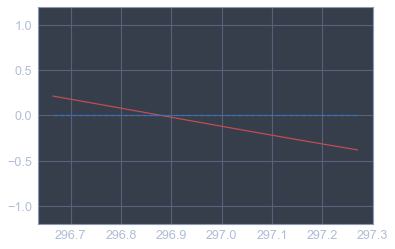

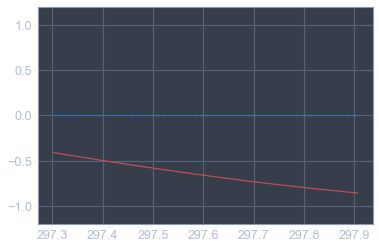

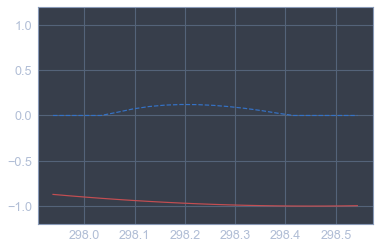

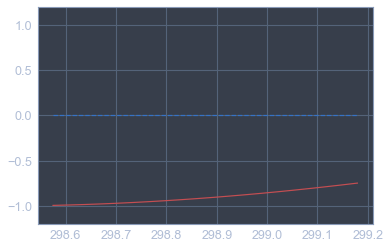

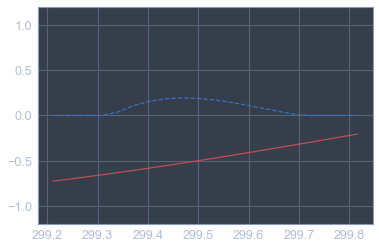

train cost:  0.25533712


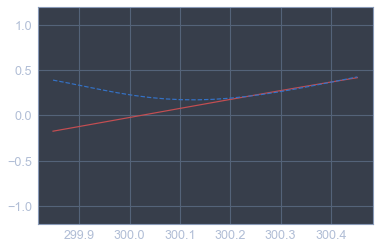

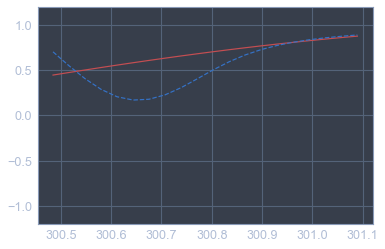

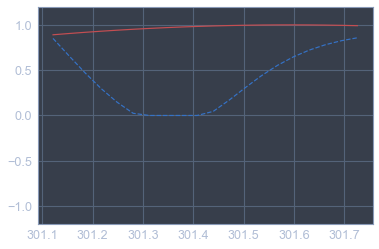

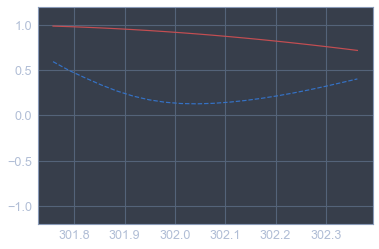

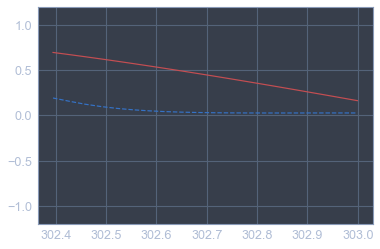

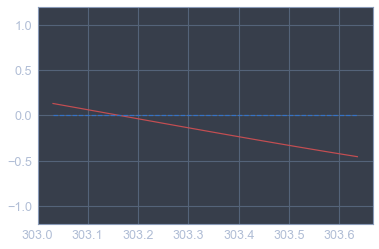

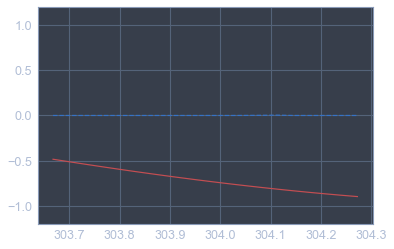

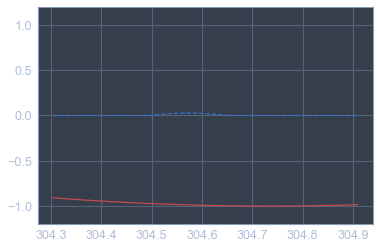

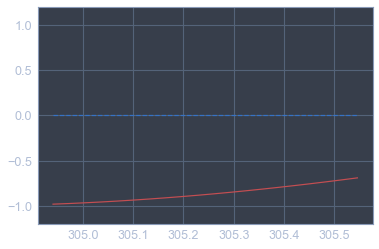

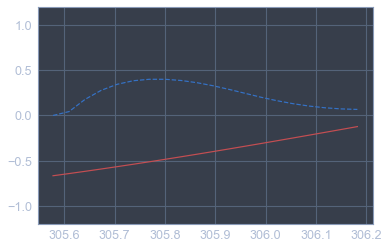

train cost:  0.2535798


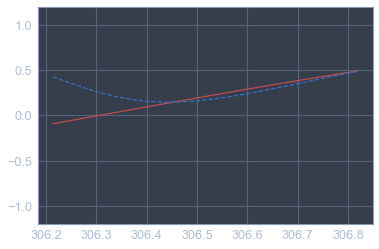

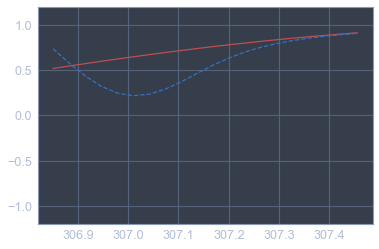

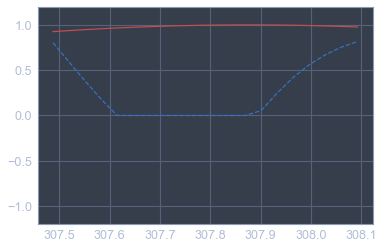

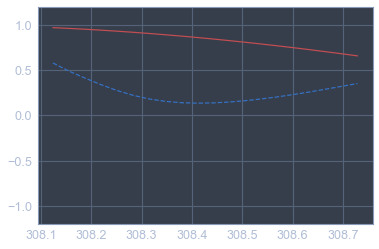

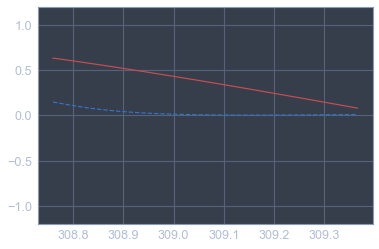

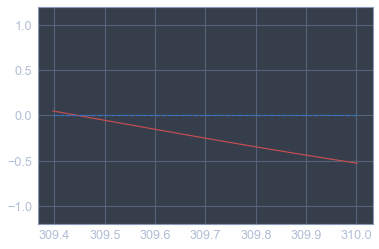

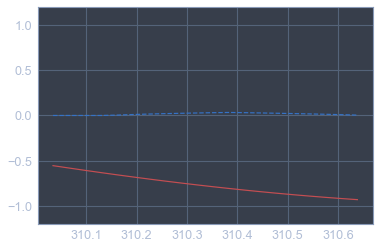

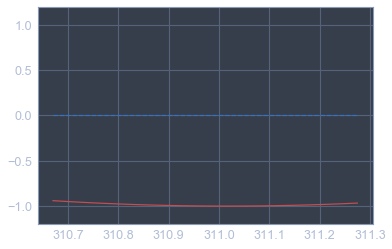

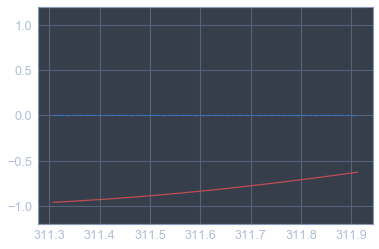

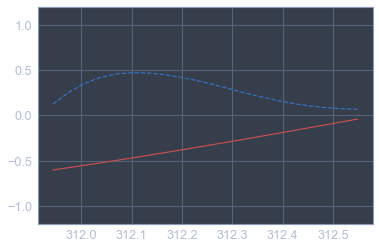

train cost:  0.2533947


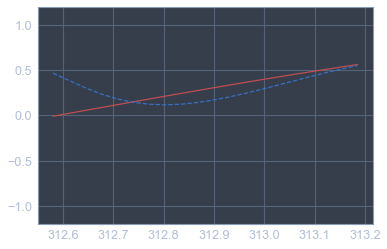

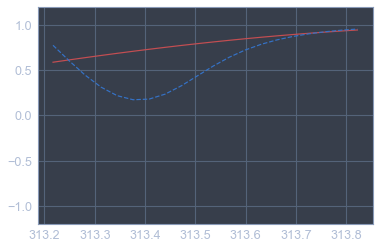

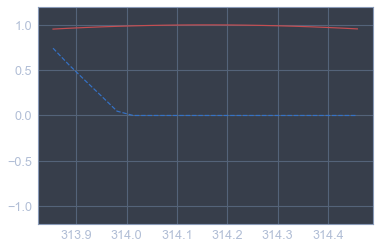

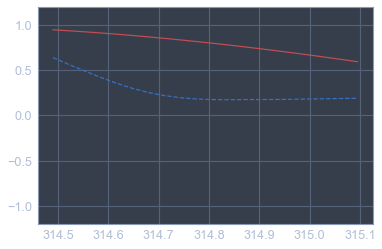

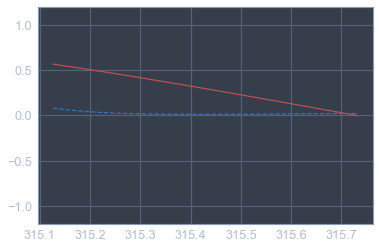

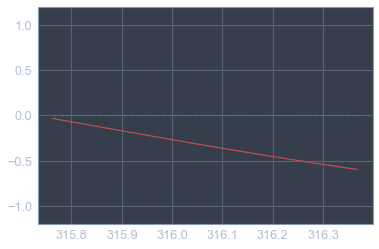

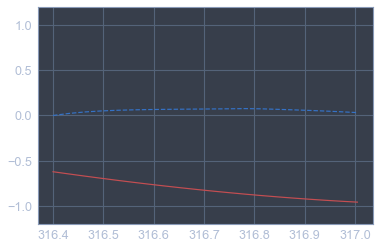

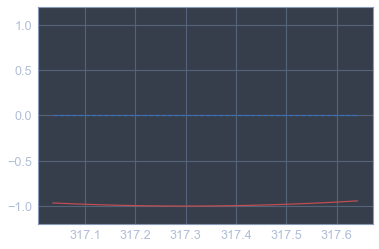

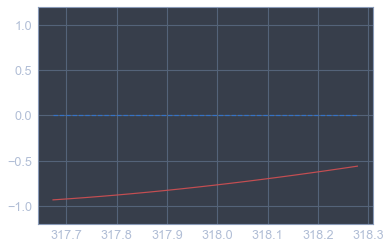

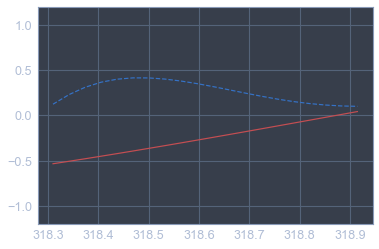

train cost:  0.25478327


In [8]:
'''
1）stateless，无状态设置。
输入为input_shape=(time_steps,input_dim)，其中time_steps就是每段sequence的长度，input_dim就是输入数据的维度（特征个数）
2）stateful=True，有设置状态。
输入为batch_input_shape=(batch_size,time_steps,input_dim)，其中batch_size就是批量，每批训练的个数。
'''
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, LSTM, TimeDistributed

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006


def get_batch():
    global BATCH_START, TIME_STEPS
    xs = np.arange(BATCH_START, BATCH_START + BATCH_SIZE * TIME_STEPS).reshape(
        (BATCH_SIZE, TIME_STEPS)) / (10 * np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]


# 模型初始化 并 构建网络
model = Sequential()

# RNN cell
model.add(
    LSTM(
        batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
        units=CELL_SIZE,
        return_sequences=
        True,  # True: output at all steps. False: output as last step.
        stateful=
        True,  # True: the final state of batch1 is feed into the initial state of batch2
    ))
# output layer
model.add(Dense(units=OUTPUT_SIZE, activation='relu'))

# 编译模型
adam = Adam(LR)
model.compile(optimizer=adam, loss='mse')

# 训练模型
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :],
             pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)

# 自主练习

## 自主练习之回归1

train error: 28.60932
train error: 3.8192616
train error: 0.80343074
train error: 0.20972447
train error: 0.05690769
train error: 0.016728323
train error: 0.006148857
train error: 0.0033629655
train error: 0.0026293758
train error: 0.0024362004
train error: 0.0023853276
train error: 0.002371931
train error: 0.002368407
train error: 0.0023674767
train error: 0.0023672306
train error: 0.0023671673
80/80 [==============================] - 0s 1ms/step
Testing Error 0.002507452154532075
Weight= [[3.7003086]] 
 biase= [4.9996786]


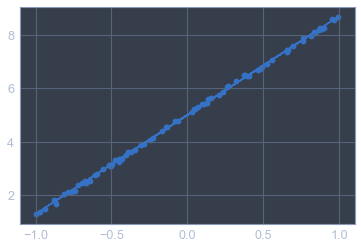

In [9]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, Activation

np.random.seed(1337)
X = np.linspace(-1, 1, 400)
y = 3.7 * X + 5 + np.random.normal(0, 0.05, (400, ))

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)

# 模型初始化及搭建网络

model = Sequential()
model.add(Dense(input_dim=1, units=1, activation='relu'))

# 编译模型
model.compile(loss='mse', optimizer='sgd')

# 训练模型
for i in range(1600):
    train_error = model.train_on_batch(X_train, y_train)
    if i % 100 == 0:
        print("train error:", train_error)

# 测试
test_error = model.evaluate(X_test, y_test, batch_size=80)
print('Testing Error', test_error)
weight, biase = model.layers[0].get_weights()
print('Weight=', weight, '\n biase=', biase)

# 预测
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## 自主练习之复杂回归2

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

# 数据预处理
o_data = datasets.load_boston()
X = pd.DataFrame(o_data.data)
y = pd.DataFrame(o_data.target)
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.2,
                                                    random_state=5)

# 模型初始化及搭建网络

model = Sequential()
model.add(Dense(input_dim=13, units=7, activation='relu'))
model.add(Dense(units=1, activation='relu'))
# 编译模型
lr = 0.001
adam = Adam(lr)
model.compile(loss='mse', optimizer=adam)

# 训练模型
print('Training......')
model.fit(X_train, y_train, epochs=4, batch_size=101)
'''
失败原因：
数据集太小，无法达到训练良好稳定的结果。
'''

Training......
Epoch 1/4
404/404 [==============================] - 0s 851us/step - loss: 598.7784
Epoch 2/4
404/404 [==============================] - 0s 0us/step - loss: 598.7784
Epoch 3/4
404/404 [==============================] - 0s 39us/step - loss: 598.7785
Epoch 4/4
404/404 [==============================] - 0s 0us/step - loss: 598.7785


'\n失败原因：\n数据集太小，无法达到训练良好稳定的结果。\n'

## 自主练习之RNN与HMM

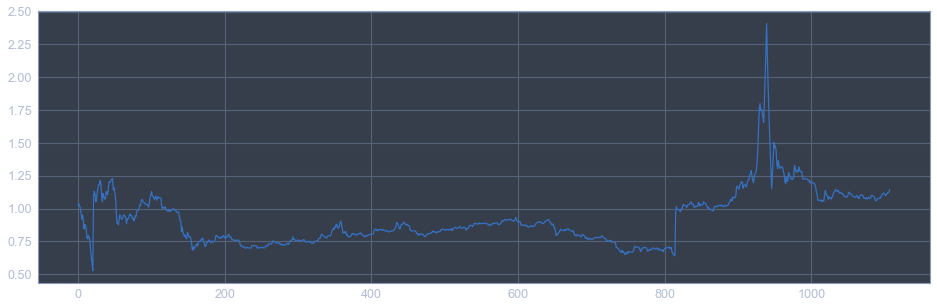

--------------------------------涨幅预测图----------------------------------


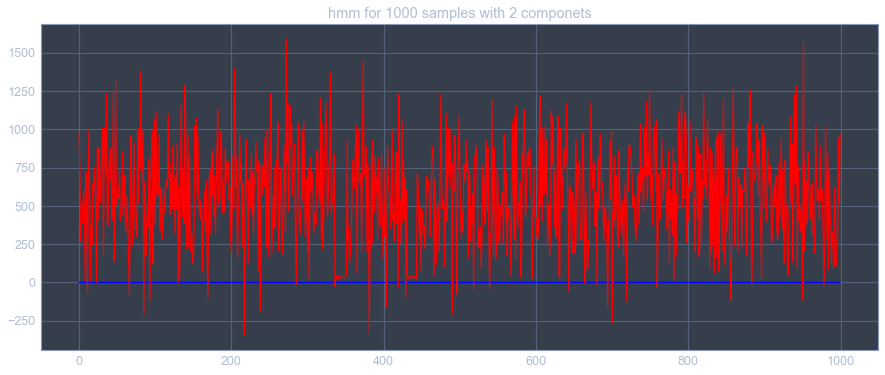

—————————————————成交量预测图————————————————


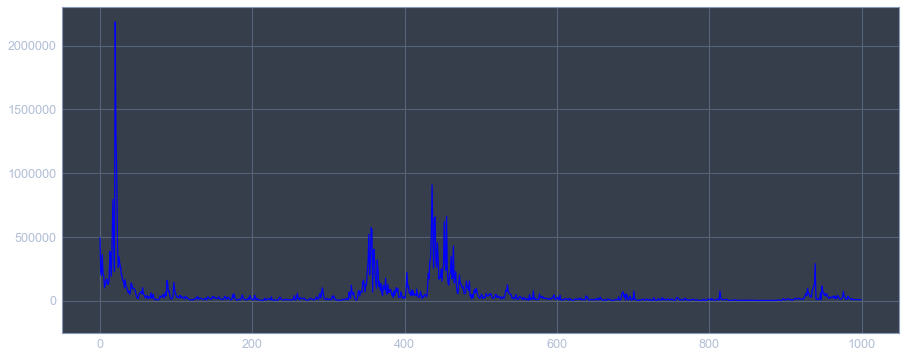

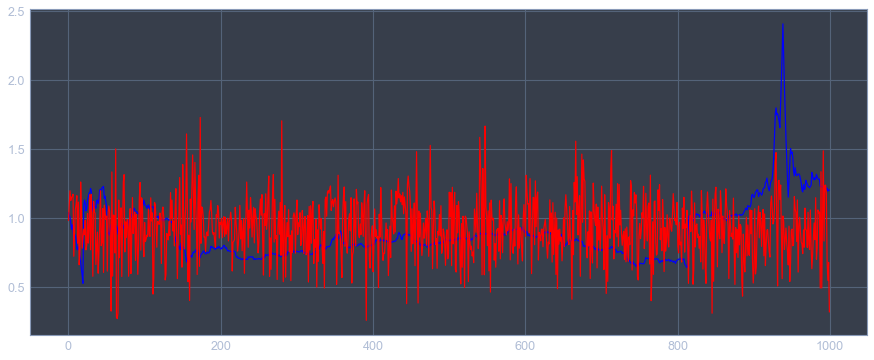

In [12]:
import tushare as ts
from keras.models import Sequential
from keras.layers import LSTM, Dense
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split

data = ts.get_k_data('502013', start='2009-01-01', end='2019-12-31', ktype='D')
data = data.iloc[:, 1:6]
close_v = data['close'].values
volume = data['volume'].values
dates = np.array([i for i in range(data.shape[0])])
fig1 = plt.figure(figsize=(16, 5))
plt.plot(close_v)
plt.show()
# 数据预处理
diff = np.diff(close_v)  #要训练的是收盘价格的变化值
dates = dates[1:]
close_v = close_v[1:]
volume = volume[1:]
X = np.c_[dates, diff, close_v, volume]

# 生成HMM模型
hmm_model = GaussianHMM(n_components=3, n_iter=1000)
hmm_model.fit(X)
# 得到隐藏状态
hidden_states = hmm_model.predict(X)

print(
    '--------------------------------涨幅预测图----------------------------------')
num_sample = 1000
samples, _ = hmm_model.sample(num_sample)
fig2 = plt.figure(figsize=(15, 6))
plt.plot(diff[:num_sample], c='blue', label='Rise%')
plt.plot(samples[:, 0], c='red', label='Predicted%')
plt.title('hmm for 1000 samples with 2 componets')
plt.show()

print('—————————————————成交量预测图————————————————')
fig3 = plt.figure(figsize=(15, 6))
plt.plot(volume[:num_sample], c='blue')
plt.plot(samples[:1], c='red', label='Predicted%')
plt.show()

fig4 = plt.figure(figsize=(15, 6))
plt.plot(close_v[:num_sample], c='blue', label='Rise%')
plt.plot(samples[:, 2], c='red', label='Predicted%')
plt.show()

In [ ]:
import os
import sys
#数据预处理以及绘制图形需要的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization


def get_dataset():
    #从csv读取数据
    dataset = pd.read_csv('./000001.csv', encoding='gb18030')
    #print(dataset)
    #数据集的维度
    print(dataset.shape)
    #将数据价转换为整数
    dataset['开盘价'] = dataset['开盘价'].astype(int)
    dataset['收盘价'] = dataset['收盘价'].astype(int)
    dataset['成交量'] = dataset['成交量'].astype(int)
    # 列名选取行，剔除不需要开头的行
    dataframeDataset = dataset.loc[1:, ['开盘价', '收盘价', '成交量']]
    print(dataframeDataset.shape)
    # 反转数据
    dataframeDatasetReverse = dataframeDataset.reindex(
        index=dataframeDataset.index[::-1])
    # 历史日期在前
    ndarrayDataset = dataframeDatasetReverse.values
    #print(ndarrayDataset)
    #画图大盘数据图
    #plt.plot(ndarrayDataset[:,0], ndarrayDataset[:,1])
    #plt.show()
    return ndarrayDataset


def get_lstm_dataset(dataset, need_num, total_dataset):
    lstm_dataset = []
    for i in range(need_num, total_dataset):
        lstm_dataset.append(dataset[i - need_num:i])
    lstm_dataset = np.array(lstm_dataset)
    #print(xTrain)
    #print(lstm_dataset.shape)
    return lstm_dataset


#需要之前5次的股票数据来预测下一次的数据，
need_num = 5
#训练数据的大小
training_num = 240
#测试数据的大小
test_num = 1
#迭代训练10次
epoch = 10
#每次取数据数量
batch_size = 10

#数据处理
ndarrayDataset = get_dataset()
# 构建训练集
x_train = ndarrayDataset[0:training_num]
#print(x_train)
y_train = []
for i in range(1, training_num + 1):
    y_train.append(ndarrayDataset[i, 0])
#print(y_train)
# 转换dt数据
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

#数据归一化,fit_transform处理后就变成list
sc_X = MinMaxScaler(feature_range=(0, 1))
x_train = sc_X.fit_transform(x_train)
x_train = np.array(x_train)
print(x_train.shape)

#print(x_train)
#print(x_train.shape)
# outcome scaling:
sc_Y = MinMaxScaler(feature_range=(0, 1))
y_train = sc_Y.fit_transform(y_train.reshape(-1, 1))
y_train = np.array(y_train)
print(y_train.shape)

#构建LSTM需要的数据
xTrain = []
for i in range(need_num, training_num):
    xTrain.append(x_train[i - need_num:i])
xTrain = np.array(xTrain)
#print(xTrain)
print(xTrain.shape)
x_train = xTrain

yTrain = []
for i in range(need_num, training_num):
    yTrain.append(y_train[i - need_num])
yTrain = np.array(yTrain)
#print(yTrain)
print(yTrain.shape)
y_train = yTrain
#因为LSTM要求输入的数据格式为三维的，[training_number, time_steps, 1]，因此对数据进行相应转化
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#构建网络，使用的是序贯模型
model = Sequential()
#return_sequences=True返回的是全部输出，LSTM做第一层时，需要指定输入shape
model.add(
    LSTM(units=128,
         return_sequences=True,
         input_shape=[x_train.shape[1], x_train.shape[2]]))
model.add(BatchNormalization())

model.add(LSTM(units=128))
model.add(BatchNormalization())

model.add(Dense(units=1))
#进行配置
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

#训练网络
model.fit(x=x_train, y=y_train, epochs=epoch, batch_size=batch_size)

#进行测试数据的处理
#将训练集的数据向后移动，增加上需要预测的数据
x_test = ndarrayDataset[test_num:training_num + test_num]
y_test = []
for i in range(test_num + 1, training_num + test_num + 1):
    y_test.append(ndarrayDataset[i, 0])
#print(y_train)
# 转换dt数据
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

#测试数据的归一化
sc_X_T = MinMaxScaler(feature_range=(0, 1))
x_test = sc_X_T.fit_transform(x_test)
x_test = np.array(x_test)
#print(x_test)
print(x_test.shape)
sc_Y_T = MinMaxScaler(feature_range=(0, 1))
y_test_transform = sc_Y_T.fit_transform(y_test.reshape(-1, 1))
y_test_transform = np.array(y_test_transform)
#print(y_test_transform)
print(y_test_transform.shape)
#获取对应的开盘价列

#构建LSTM需要的数据
xTest = []
for i in range(need_num, training_num):
    xTest.append(x_test[i - need_num:i])
xTest = np.array(xTest)
#print(xTrain)
print(xTest.shape)
x_test = xTest

yTest = []
for i in range(need_num, training_num):
    yTest.append(y_test[i - need_num])
yTest = np.array(yTest)
#print(yTrain)
print(yTest.shape)
y_test = yTest

#进行预测
y_predictes = model.predict(x=x_test)
print(y_predictes)
print(y_predictes.shape)
#使用 sc.inverse_transform()将归一化的数据转换回原始的数据，以便我们在图上进行查看
y_predictes = sc_Y_T.inverse_transform(X=y_predictes)
print(y_predictes)

#绘制数据图表，红色是真实数据，蓝色是预测数据
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(y_predictes, color='blue', label='Predicted Stock Price')
plt.title(label='ShangHai Stock Price Prediction')
plt.xlabel(xlabel='Time')
plt.ylabel(ylabel='ShangHai Stock Price')
plt.legend()
plt.show()

In [13]:
import numpy as np
import pandas as pd
import tushare as ts
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, TimeDistributed
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split

#迭代训练10次
epoch = 5

data = ts.get_k_data('502013', start='2009-01-01', end='2019-12-31', ktype='D')
data = data.iloc[:, 1:6]
X = data.values
y = data['close']
X_train = X[:1000]
X_test = X[1000:]
y_train = y[:1000]
y_test = y[1000:]
# 数据预处理

steps = 10
X_train = X_train.reshape(int(len(X_train) / steps), steps, 5)
y_train = y_train.values.reshape(int(len(y_train) / steps), steps, 1)

#构建网络，使用的是序贯模型
model = Sequential()
#return_sequences=True返回的是全部输出，LSTM做第一层时，需要指定输入shape
model.add(LSTM(units=128, input_shape=(steps, 5), return_sequences=True))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(units=1, activation='relu')))

#进行配置
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

#训练网络
model.fit(X_train, y_train, epochs=epoch)

Epoch 1/5
100/100 [==============================] - 1s 10ms/step - loss: 0.0465 - acc: 0.0020
Epoch 2/5
100/100 [==============================] - 0s 468us/step - loss: 0.0462 - acc: 0.0020
Epoch 3/5
100/100 [==============================] - 0s 468us/step - loss: 0.0478 - acc: 0.0020
Epoch 4/5
100/100 [==============================] - 0s 469us/step - loss: 0.0473 - acc: 0.0020
Epoch 5/5
100/100 [==============================] - 0s 469us/step - loss: 0.0459 - acc: 0.0020


#  Neurolab 学习

In [14]:
import neurolab as nl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

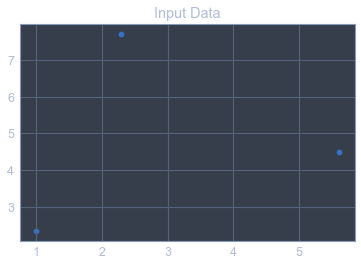

The goal of learning is reached


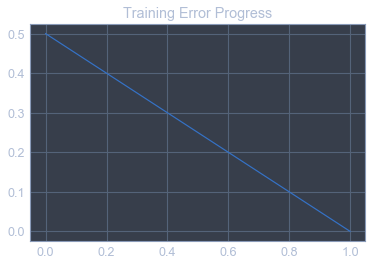

In [15]:
# 创建一个感知器

data = np.array([[1, 2.35], [5.6, 4.5], [2.3, 7.7]])
labels = np.array([[0], [1], [0]])
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Input Data')
plt.show()

model = nl.net.newp([[0, 10], [0, 1]], 1)
error = model.train(data, labels, epochs=50, show=15, lr=0.1)
plt.figure()
plt.plot(error)
plt.title('Training Error Progress')
plt.show()

In [ ]:
# 创建一个深层神经网络

min_value = -12
max_value = 12
points = 90

x = np.linspace(min_value, max_value, points)
y = 2 * np.square(x) + 5
y /= np.linalg.norm(y)
data = x.reshape(points, 1)
labels = y.reshape(points, 1)
layer_net = nl.net.newff([[min_value, max_value]], [50, 50, 50, 1])
layer_net.trainf = nl.train.train_gd
error = layer_net.train(data, labels, epochs=1000, show=100, goal=0.01)
y_pred = layer_net.sim(data)

plt.figure()
plt.scatter(data, labels, color="green")
plt.scatter(data, y_pred)
plt.title('Input Data & Expected Data')

plt.figure()
plt.plot(error)
plt.show()